# Bank Telemarketing Campaign_EDA_Project

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

### Data preparation step 1- 
#### Assigning proper column names and format to the dataset in dataframe and segregation of the attributes for further analysis-

In [47]:
df=pd.read_csv(r"C:\Users\mamatha.v\Desktop\ABADS\Project\bank_marketing_updated_v1.csv")
df

C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\2340028891.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\mamatha.v\Desktop\ABADS\Project\bank_marketing_updated_v1.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [51]:
df = df.drop(df.index[0])
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [53]:
df.columns=df.iloc[0]
df

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [55]:
df = df[1:]
df

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [57]:
df.reset_index(drop=True, inplace=True)
df

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## Objective(1)- Understanding The Data

### 1.a)- Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [25]:
df.head(10)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45209 entries, 2 to 45210
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2                     45209 non-null  int64  
 1   44.0                  45189 non-null  float64
 2   60000                 45209 non-null  int64  
 3   29                    45209 non-null  int64  
 4   single                45209 non-null  object 
 5   technician,secondary  45209 non-null  object 
 6   yes                   45209 non-null  object 
 7   no                    45209 non-null  object 
 8   yes                   45209 non-null  object 
 9   no                    45209 non-null  object 
 10  unknown               45209 non-null  object 
 11  5                     45209 non-null  int64  
 12  may, 2017             45159 non-null  object 
 13  151 sec               45209 non-null  object 
 14  1                     45209 non-null  int64  
 15  -1                 

(45209, 19)

### 1.b)- Inspect for any instances of missing values, outliers, or data inconsistencies.

In [27]:
df.isnull().sum() 

1
2                        0
44.0                    20
60000                    0
29                       0
single                   0
technician,secondary     0
yes                      0
no                       0
yes                      0
no                       0
unknown                  0
5                        0
may, 2017               50
151 sec                  0
1                        0
-1                       0
0                        0
unknown                  0
no                      30
dtype: int64

The dataframe has following data inconsistencies-

1. The jobedu table has two attributes, and we need to split them to come at a conclusion.
2. Similarly, the month attribute is holding two attributes in a single column, so here also we need to segregate the month name and year.
3. The duration attribute has values both in seconds and minutes, hence we are required maintain data consistency by maintaining the attribute values in either seconds or minutes. 
4. The second last column does not have any attribute name, hence from the data dictionary we need to find it's correct name and assign approprite name.
5. All the attributes are present in string (Object) format, hence it is required to assign them a correct data type for further analysis.

#### In the following steps all the above mentioned data inconsistencies are handled and a transformed & cleaned dataframe is derived.  

In [59]:
df1=df.rename(columns={'customerid':'Customer_Id','age':'Age','salary':'Salary','balance':'Balance',
                      'marital':'Marital_Status','jobedu':'JobEducation','targeted':'Past_Targeted',
                      'default':'Past_Loan_Default','housing':'Housing_Loan','loan':'Personal_Loan',
                      'contact':'Contact_Mode','day':'Day','month':'Month','duration':'Call_Duration', 
                      'campaign':'No_of_Campaigns_Customer_Contacted','pdays':'P_Days','previous':'P_Times','0':'Previous_Contact_Outcome',
                      'response':'Opening_of_Term-deposit_Acct'})
df1.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
1,,,,,,,,,,,,,,,,,,,,,
Customer_Id,1,2,3,4,5,6,7,8,9,10,...,45202,45203,45204,45205,45206,45207,45208,45209,45210,45211
Age,58,44,33,47,33,35,28,42,58,43,...,53.0,34.0,23.0,73.0,25.0,51.0,71.0,72.0,57.0,37.0
Salary,100000,60000,120000,20000,0,100000,100000,120000,55000,60000,...,100000,50000,4000,55000,60000,60000,55000,55000,20000,120000
Balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
Marital_Status,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
JobEducation,"management,tertiary","technician,secondary","entrepreneur,secondary","blue-collar,unknown","unknown,unknown","management,tertiary","management,tertiary","entrepreneur,tertiary","retired,primary","technician,secondary",...,"management,tertiary","admin.,secondary","student,tertiary","retired,secondary","technician,secondary","technician,tertiary","retired,primary","retired,secondary","blue-collar,secondary","entrepreneur,secondary"
Past_Targeted,yes,yes,yes,no,no,yes,no,no,yes,yes,...,yes,yes,no,yes,yes,yes,yes,yes,yes,yes
Past_Loan_Default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
Housing_Loan,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no


### Data preparation step 2- 

#### Handling the numeric variables-

In [61]:
df_continuous=df1[['Age','Salary','Balance','Call_Duration','No_of_Campaigns_Customer_Contacted','P_Days','P_Times']].astype(object)
df_continuous

1,Age,Salary,Balance,Call_Duration,No_of_Campaigns_Customer_Contacted,P_Days,P_Times
0,58,100000,2143,261 sec,1,-1,0
1,44,60000,29,151 sec,1,-1,0
2,33,120000,2,76 sec,1,-1,0
3,47,20000,1506,92 sec,1,-1,0
4,33,0,1,198 sec,1,-1,0
...,...,...,...,...,...,...,...
45206,51.0,60000,825,16.2833333333333 min,3,-1,0
45207,71.0,55000,1729,7.6 min,2,-1,0
45208,72.0,55000,5715,18.7833333333333 min,5,184,3
45209,57.0,20000,668,8.46666666666667 min,4,-1,0


#### Here Call_Duration attribute is present in both the units(sec/min) hence, we have to convert call duration from sec to min to maintain the data consistency.

In [63]:
df_continuous['Call_Duration']

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: Call_Duration, Length: 45211, dtype: object

In [65]:
x=df_continuous.loc[df_continuous['Call_Duration'].str.contains('sec')]
x

1,Age,Salary,Balance,Call_Duration,No_of_Campaigns_Customer_Contacted,P_Days,P_Times
0,58,100000,2143,261 sec,1,-1,0
1,44,60000,29,151 sec,1,-1,0
2,33,120000,2,76 sec,1,-1,0
3,47,20000,1506,92 sec,1,-1,0
4,33,0,1,198 sec,1,-1,0
...,...,...,...,...,...,...,...
14110,34,50000,444,173 sec,2,-1,0
14111,33,60000,1249,261 sec,2,-1,0
14112,43,50000,392,87 sec,2,-1,0
14113,42,50000,645,42 sec,2,-1,0


In [67]:
x['Call_Duration_Min'] = x['Call_Duration'].str.extract('(\d+)').astype(float)/60
x

C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\916182653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Call_Duration_Min'] = x['Call_Duration'].str.extract('(\d+)').astype(float)/60


1,Age,Salary,Balance,Call_Duration,No_of_Campaigns_Customer_Contacted,P_Days,P_Times,Call_Duration_Min
0,58,100000,2143,261 sec,1,-1,0,4.350000
1,44,60000,29,151 sec,1,-1,0,2.516667
2,33,120000,2,76 sec,1,-1,0,1.266667
3,47,20000,1506,92 sec,1,-1,0,1.533333
4,33,0,1,198 sec,1,-1,0,3.300000
...,...,...,...,...,...,...,...,...
14110,34,50000,444,173 sec,2,-1,0,2.883333
14111,33,60000,1249,261 sec,2,-1,0,4.350000
14112,43,50000,392,87 sec,2,-1,0,1.450000
14113,42,50000,645,42 sec,2,-1,0,0.700000


In [69]:
y=df_continuous.loc[df_continuous['Call_Duration'].str.contains('min')]
y

1,Age,Salary,Balance,Call_Duration,No_of_Campaigns_Customer_Contacted,P_Days,P_Times
14115,36,50000,48,2.45 min,10,-1,0
14116,50,120000,0,11.95 min,2,-1,0
14117,34,50000,3814,4.76666666666667 min,2,-1,0
14118,35,70000,167,10.2333333333333 min,2,-1,0
14119,38,120000,-21,0.833333333333333 min,2,-1,0
...,...,...,...,...,...,...,...
45206,51.0,60000,825,16.2833333333333 min,3,-1,0
45207,71.0,55000,1729,7.6 min,2,-1,0
45208,72.0,55000,5715,18.7833333333333 min,5,184,3
45209,57.0,20000,668,8.46666666666667 min,4,-1,0


In [341]:
y['Call_Duration_Min'] = y['Call_Duration'].str.extract(r'([\d.]+)').astype(float)
y

C:\Users\aniru\AppData\Local\Temp\ipykernel_17332\3604374439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Call_Duration_Min'] = y['Call_Duration'].str.extract(r'([\d.]+)').astype(float)


1,Age,Salary,Balance,Call_Duration,No_of_Campaigns_Customer_Contacted,P_Days,P_Times,Call_Duration_Min
14115,36,50000,48,2.45 min,10,-1,0,2.450000
14116,50,120000,0,11.95 min,2,-1,0,11.950000
14117,34,50000,3814,4.76666666666667 min,2,-1,0,4.766667
14118,35,70000,167,10.2333333333333 min,2,-1,0,10.233333
14119,38,120000,-21,0.833333333333333 min,2,-1,0,0.833333
...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,16.2833333333333 min,3,-1,0,16.283333
45207,71.0,55000,1729,7.6 min,2,-1,0,7.600000
45208,72.0,55000,5715,18.7833333333333 min,5,184,3,18.783333
45209,57.0,20000,668,8.46666666666667 min,4,-1,0,8.466667


In [71]:
df_cont=pd.concat([x,y],axis=0)
df_cont

1,Age,Salary,Balance,Call_Duration,No_of_Campaigns_Customer_Contacted,P_Days,P_Times,Call_Duration_Min
0,58,100000,2143,261 sec,1,-1,0,4.350000
1,44,60000,29,151 sec,1,-1,0,2.516667
2,33,120000,2,76 sec,1,-1,0,1.266667
3,47,20000,1506,92 sec,1,-1,0,1.533333
4,33,0,1,198 sec,1,-1,0,3.300000
...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,16.2833333333333 min,3,-1,0,NaN
45207,71.0,55000,1729,7.6 min,2,-1,0,NaN
45208,72.0,55000,5715,18.7833333333333 min,5,184,3,NaN
45209,57.0,20000,668,8.46666666666667 min,4,-1,0,NaN


In [73]:
df_cont['Call_Duration_Min'].info()

<class 'pandas.core.series.Series'>
Index: 45211 entries, 0 to 45210
Series name: Call_Duration_Min
Non-Null Count  Dtype  
--------------  -----  
14115 non-null  float64
dtypes: float64(1)
memory usage: 706.4 KB


In [77]:
df_cont_1=df_cont.drop(['Call_Duration'],axis=1)
df_cont_1

1,Age,Salary,Balance,No_of_Campaigns_Customer_Contacted,P_Days,P_Times,Call_Duration_Min
0,58,100000,2143,1,-1,0,4.350000
1,44,60000,29,1,-1,0,2.516667
2,33,120000,2,1,-1,0,1.266667
3,47,20000,1506,1,-1,0,1.533333
4,33,0,1,1,-1,0,3.300000
...,...,...,...,...,...,...,...
45206,51.0,60000,825,3,-1,0,NaN
45207,71.0,55000,1729,2,-1,0,NaN
45208,72.0,55000,5715,5,184,3,NaN
45209,57.0,20000,668,4,-1,0,NaN


In [79]:
df_cont_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 45191 non-null  object 
 1   Salary                              45211 non-null  object 
 2   Balance                             45211 non-null  object 
 3   No_of_Campaigns_Customer_Contacted  45211 non-null  object 
 4   P_Days                              45211 non-null  object 
 5   P_Times                             45211 non-null  object 
 6   Call_Duration_Min                   14115 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.8+ MB


#### Assigning the proper datatype to the numeric variables and removal of whitespaces-

In [81]:
df_cont_2=df_cont_1[['Age','Salary','Balance','No_of_Campaigns_Customer_Contacted',
                     'P_Days','P_Times','Call_Duration_Min']].astype(str)
print(df_cont_2['Age'].str.strip())
print(df_cont_2['Salary'].str.strip())
print(df_cont_2['No_of_Campaigns_Customer_Contacted'].str.strip())
print(df_cont_2['P_Days'].str.strip())
print(df_cont_2['P_Times'].str.strip())
print(df_cont_2['Call_Duration_Min'].str.strip())
df_cont_2=df_cont_1[['Age','Salary','Balance','No_of_Campaigns_Customer_Contacted',
                     'P_Days','P_Times','Call_Duration_Min']].astype(float)
df_cont_2.info()
df_cont_2

0          58
1          44
2          33
3          47
4          33
         ... 
45206    51.0
45207    71.0
45208    72.0
45209    57.0
45210    37.0
Name: Age, Length: 45211, dtype: object
0        100000
1         60000
2        120000
3         20000
4             0
          ...  
45206     60000
45207     55000
45208     55000
45209     20000
45210    120000
Name: Salary, Length: 45211, dtype: object
0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: No_of_Campaigns_Customer_Contacted, Length: 45211, dtype: object
0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: P_Days, Length: 45211, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
45206     0
45207     0
45208     3
45209     0
45210    11
Name: P_Times, Length: 45211, dtype: object
0                      4.35
1    

1,Age,Salary,Balance,No_of_Campaigns_Customer_Contacted,P_Days,P_Times,Call_Duration_Min
0,58.0,100000.0,2143.0,1.0,-1.0,0.0,4.350000
1,44.0,60000.0,29.0,1.0,-1.0,0.0,2.516667
2,33.0,120000.0,2.0,1.0,-1.0,0.0,1.266667
3,47.0,20000.0,1506.0,1.0,-1.0,0.0,1.533333
4,33.0,0.0,1.0,1.0,-1.0,0.0,3.300000
...,...,...,...,...,...,...,...
45206,51.0,60000.0,825.0,3.0,-1.0,0.0,NaN
45207,71.0,55000.0,1729.0,2.0,-1.0,0.0,NaN
45208,72.0,55000.0,5715.0,5.0,184.0,3.0,NaN
45209,57.0,20000.0,668.0,4.0,-1.0,0.0,NaN


In [83]:
df_cont_2.isnull().sum()

1
Age                                      20
Salary                                    0
Balance                                   0
No_of_Campaigns_Customer_Contacted        0
P_Days                                    0
P_Times                                   0
Call_Duration_Min                     31096
dtype: int64

#### Missing value handling for the Age attribute-

In [85]:
df_cont_2['Age'].skew()

0.6850014193798112

<Axes: xlabel='Age', ylabel='Density'>

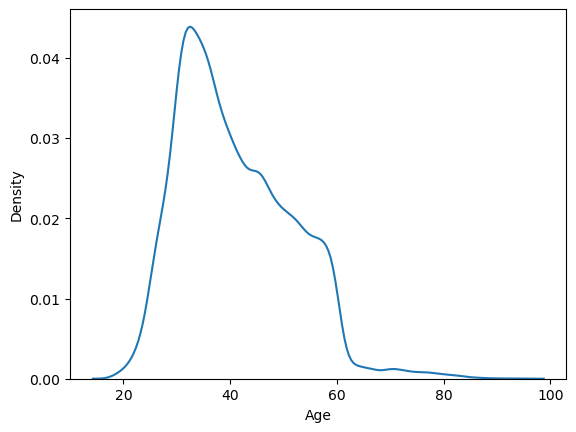

In [349]:
sns.kdeplot(data=df_cont_2,x='Age')

#### As the value of skewness is lying in between the acceptable range of (+1.0 to -1.0), we can use mean to fill the missing values.

In [87]:
df_cont_3=df_cont_2.fillna(df_cont_2['Age'].mean(),inplace=False)
df_cont_3.info()
df_cont_3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 45211 non-null  float64
 1   Salary                              45211 non-null  float64
 2   Balance                             45211 non-null  float64
 3   No_of_Campaigns_Customer_Contacted  45211 non-null  float64
 4   P_Days                              45211 non-null  float64
 5   P_Times                             45211 non-null  float64
 6   Call_Duration_Min                   45211 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


1
Age                                   0
Salary                                0
Balance                               0
No_of_Campaigns_Customer_Contacted    0
P_Days                                0
P_Times                               0
Call_Duration_Min                     0
dtype: int64

In [351]:
df_cont_3['Age']=df_cont_3['Age'].round(0)
df_cont_3['Salary']=df_cont_3['Salary'].round(0)
df_cont_3['Balance']=df_cont_3['Balance'].round(0)
df_cont_3['No_of_Campaigns_Customer_Contacted']=df_cont_3['No_of_Campaigns_Customer_Contacted'].round(0)
df_cont_3['P_Days']=df_cont_3['P_Days'].round(0)
df_cont_3['P_Times']=df_cont_3['P_Times'].round(0)
df_cont_3['Call_Duration_Min']=df_cont_3['Call_Duration_Min'].round(2)
df_cont_3

1,Age,Salary,Balance,No_of_Campaigns_Customer_Contacted,P_Days,P_Times,Call_Duration_Min
0,58.0,100000.0,2143.0,1.0,-1.0,0.0,4.35
1,44.0,60000.0,29.0,1.0,-1.0,0.0,2.52
2,33.0,120000.0,2.0,1.0,-1.0,0.0,1.27
3,47.0,20000.0,1506.0,1.0,-1.0,0.0,1.53
4,33.0,0.0,1.0,1.0,-1.0,0.0,3.30
...,...,...,...,...,...,...,...
45206,51.0,60000.0,825.0,3.0,-1.0,0.0,16.28
45207,71.0,55000.0,1729.0,2.0,-1.0,0.0,7.60
45208,72.0,55000.0,5715.0,5.0,184.0,3.0,18.78
45209,57.0,20000.0,668.0,4.0,-1.0,0.0,8.47


In [89]:
df_cont_3['Age'].unique()
df_cont_3['Salary'].unique()
df_cont_3['Balance'].unique()
df_cont_3['No_of_Campaigns_Customer_Contacted'].unique()
df_cont_3['P_Days'].unique()
df_cont_3['P_Times'].unique()
df_cont_3['Call_Duration_Min'].unique()

array([ 4.35      ,  2.51666667,  1.26666667, ..., 24.98333333,
       23.31666667, 40.9356509 ])

In [91]:
df_cont_final=df_cont_3
df_cont_final.info()

#This is the final dataframe containing all the numeric attributes.

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 45211 non-null  float64
 1   Salary                              45211 non-null  float64
 2   Balance                             45211 non-null  float64
 3   No_of_Campaigns_Customer_Contacted  45211 non-null  float64
 4   P_Days                              45211 non-null  float64
 5   P_Times                             45211 non-null  float64
 6   Call_Duration_Min                   45211 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


## Data Preparation step 3- 

#### Handling the datetime variables-

In [93]:
df_datetime=df1[['Day','Month']]
df_datetime

1,Day,Month
0,5,"may, 2017"
1,5,"may, 2017"
2,5,"may, 2017"
3,5,"may, 2017"
4,5,"may, 2017"
...,...,...
45206,17,"nov, 2017"
45207,17,"nov, 2017"
45208,17,"nov, 2017"
45209,17,"nov, 2017"


In [95]:
df_datetime[['Month', 'Year']]=df_datetime['Month'].str.split(', ', expand=True)
df_datetime

C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\3424016780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datetime[['Month', 'Year']]=df_datetime['Month'].str.split(', ', expand=True)
C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\3424016780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datetime[['Month', 'Year']]=df_datetime['Month'].str.split(', ', expand=True)


1,Day,Month,Year
0,5,may,2017
1,5,may,2017
2,5,may,2017
3,5,may,2017
4,5,may,2017
...,...,...,...
45206,17,nov,2017
45207,17,nov,2017
45208,17,nov,2017
45209,17,nov,2017


In [356]:
df_datetime['Day']=df_datetime['Day'].str.strip()
df_datetime['Day'].unique()

df_datetime['Month']=df_datetime['Month'].str.strip()
df_datetime['Month'].unique()

df_datetime['Year']=df_datetime['Year'].str.strip()
df_datetime['Year'].unique()

df_datetime.info()
df_datetime.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     32766 non-null  object
 1   Month   45161 non-null  object
 2   Year    45161 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


C:\Users\aniru\AppData\Local\Temp\ipykernel_17332\2536917434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datetime['Day']=df_datetime['Day'].str.strip()
C:\Users\aniru\AppData\Local\Temp\ipykernel_17332\2536917434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datetime['Month']=df_datetime['Month'].str.strip()
C:\Users\aniru\AppData\Local\Temp\ipykernel_17332\2536917434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

1
Day      12445
Month       50
Year        50
dtype: int64

#### Handling missing values for the variables month and year.

In [99]:
df_datetime.describe()

1,Day,Month,Year
count,45211,45211,45211
unique,62,12,1
top,20,may,2017
freq,2030,13797,45211


In [97]:
df_datetime=df_datetime.fillna({'Day':df_datetime['Day'].mode()[0],
                                  'Month':df_datetime['Month'].mode()[0],
                                  'Year':df_datetime['Year'].mode()[0]},inplace=False)
df_datetime.info()
df_datetime.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     45211 non-null  object
 1   Month   45211 non-null  object
 2   Year    45211 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


1
Day      0
Month    0
Year     0
dtype: int64

#### Assigning proper datatype to the datetime attributes

In [101]:
df_datetime.head()

1,Day,Month,Year
0,5,may,2017
1,5,may,2017
2,5,may,2017
3,5,may,2017
4,5,may,2017


In [105]:
df_datetime['Day']=df_datetime['Day'].astype(int)
df_datetime['Year']=df_datetime['Year'].astype(int)
df_datetime_final=df_datetime

In [107]:
df_datetime_final.info()
df_datetime_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     45211 non-null  int32 
 1   Month   45211 non-null  object
 2   Year    45211 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 706.6+ KB


1,Day,Month,Year
0,5,may,2017
1,5,may,2017
2,5,may,2017
3,5,may,2017
4,5,may,2017
...,...,...,...
45206,17,nov,2017
45207,17,nov,2017
45208,17,nov,2017
45209,17,nov,2017


## Data preparation step-4

#### Handling the Categorical Variables-

In [139]:
df_cat = df1[['Customer_Id','Marital_Status','JobEducation','Past_Targeted','Past_Loan_Default','Housing_Loan',
                    'Personal_Loan','Contact_Mode','Opening_of_Term-deposit_Acct']]
df_cat

1,Customer_Id,Marital_Status,JobEducation,Past_Targeted,Past_Loan_Default,Housing_Loan,Personal_Loan,Contact_Mode,Opening_of_Term-deposit_Acct
0,1,married,"management,tertiary",yes,no,yes,no,unknown,no
1,2,single,"technician,secondary",yes,no,yes,no,unknown,no
2,3,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,no
3,4,married,"blue-collar,unknown",no,no,yes,no,unknown,no
4,5,single,"unknown,unknown",no,no,no,no,unknown,no
...,...,...,...,...,...,...,...,...,...
45206,45207,married,"technician,tertiary",yes,no,no,no,cellular,yes
45207,45208,divorced,"retired,primary",yes,no,no,no,cellular,yes
45208,45209,married,"retired,secondary",yes,no,no,no,cellular,yes
45209,45210,married,"blue-collar,secondary",yes,no,no,no,telephone,no


In [141]:
# Creation of individual columns for job and education level attributes.

df_cat[['Customer_Job','Customer_Education_Level']]=df_cat['JobEducation'].str.split(',',expand=True)
df_cat

C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\402403563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[['Customer_Job','Customer_Education_Level']]=df_cat['JobEducation'].str.split(',',expand=True)
C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\402403563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[['Customer_Job','Customer_Education_Level']]=df_cat['JobEducation'].str.split(',',expand=True)


1,Customer_Id,Marital_Status,JobEducation,Past_Targeted,Past_Loan_Default,Housing_Loan,Personal_Loan,Contact_Mode,Opening_of_Term-deposit_Acct,Customer_Job,Customer_Education_Level
0,1,married,"management,tertiary",yes,no,yes,no,unknown,no,management,tertiary
1,2,single,"technician,secondary",yes,no,yes,no,unknown,no,technician,secondary
2,3,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,no,entrepreneur,secondary
3,4,married,"blue-collar,unknown",no,no,yes,no,unknown,no,blue-collar,unknown
4,5,single,"unknown,unknown",no,no,no,no,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,married,"technician,tertiary",yes,no,no,no,cellular,yes,technician,tertiary
45207,45208,divorced,"retired,primary",yes,no,no,no,cellular,yes,retired,primary
45208,45209,married,"retired,secondary",yes,no,no,no,cellular,yes,retired,secondary
45209,45210,married,"blue-collar,secondary",yes,no,no,no,telephone,no,blue-collar,secondary


In [145]:
df_cat['Marital_Status']=df_cat['Marital_Status'].str.strip()
df_cat['Marital_Status'].unique()

df_cat['Past_Targeted']=df_cat['Past_Targeted'].str.strip()
df_cat['Past_Targeted'].unique()

df_cat['Past_Loan_Default']=df_cat['Past_Loan_Default'].str.strip()
df_cat['Past_Loan_Default'].unique()

df_cat['Housing_Loan']=df_cat['Housing_Loan'].str.strip()
df_cat['Housing_Loan'].unique()

df_cat['Personal_Loan']=df_cat['Personal_Loan'].str.strip()
df_cat['Personal_Loan'].unique()

df_cat['Contact_Mode']=df_cat['Contact_Mode'].str.strip()
df_cat['Contact_Mode'].unique()



df_cat['Opening_of_Term-deposit_Acct']=df_cat['Opening_of_Term-deposit_Acct'].str.strip()
df_cat['Opening_of_Term-deposit_Acct'].unique()

df_cat['Customer_Job']=df_cat['Customer_Job'].str.strip()
df_cat['Customer_Job'].unique()


df_cat['Customer_Education_Level']=df_cat['Customer_Education_Level'].str.strip()
df_cat['Customer_Education_Level'].unique()

C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\3152650926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Marital_Status']=df_cat['Marital_Status'].str.strip()
C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\3152650926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Past_Targeted']=df_cat['Past_Targeted'].str.strip()
C:\Users\mamatha.v\AppData\Local\Temp\ipykernel_10212\3152650926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [147]:
df_cat=df_cat.drop(['JobEducation'],axis=1)
df_cat.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
1,,,,,,,,,,,,,,,,,,,,,
Customer_Id,1,2,3,4,5,6,7,8,9,10,...,45202,45203,45204,45205,45206,45207,45208,45209,45210,45211
Marital_Status,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
Past_Targeted,yes,yes,yes,no,no,yes,no,no,yes,yes,...,yes,yes,no,yes,yes,yes,yes,yes,yes,yes
Past_Loan_Default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
Housing_Loan,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
Personal_Loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no
Contact_Mode,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
Opening_of_Term-deposit_Acct,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,yes,yes,yes,yes,yes,no,no
Customer_Job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur


In [149]:
df_cat.info()
df_cat.isnull().sum()
df_cat.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Customer_Id                   45211 non-null  object
 1   Marital_Status                45211 non-null  object
 2   Past_Targeted                 45211 non-null  object
 3   Past_Loan_Default             45211 non-null  object
 4   Housing_Loan                  45211 non-null  object
 5   Personal_Loan                 45211 non-null  object
 6   Contact_Mode                  45211 non-null  object
 7   Opening_of_Term-deposit_Acct  45181 non-null  object
 8   Customer_Job                  45211 non-null  object
 9   Customer_Education_Level      45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


,count,unique,top,freq
1,,,,
Customer_Id,45211,45211,1,1
Marital_Status,45211,3,married,27214
Past_Targeted,45211,2,yes,37091
Past_Loan_Default,45211,2,no,44396
Housing_Loan,45211,2,yes,25130
Personal_Loan,45211,2,no,37967
Contact_Mode,45211,3,cellular,29285
Opening_of_Term-deposit_Acct,45181,2,no,39894
Customer_Job,45211,12,blue-collar,9732


#### Handling the missing value in the categorical dataframe

In [151]:
df_cat=df_cat.fillna(df_cat['Opening_of_Term-deposit_Acct'].mode()[0],inplace=False)
df_cat.isnull().sum()

1
Customer_Id                     0
Marital_Status                  0
Past_Targeted                   0
Past_Loan_Default               0
Housing_Loan                    0
Personal_Loan                   0
Contact_Mode                    0
Opening_of_Term-deposit_Acct    0
Customer_Job                    0
Customer_Education_Level        0
dtype: int64

In [368]:
df_cat_final=df_cat
df_cat_final

1,Customer_Id,Marital_Status,Past_Targeted,Past_Loan_Default,Housing_Loan,Personal_Loan,Contact_Mode,Previous_Contact_Outcome,Opening_of_Term-deposit_Acct,Customer_Job,Customer_Education_Level
0,1,married,yes,no,yes,no,unknown,unknown,no,management,tertiary
1,2,single,yes,no,yes,no,unknown,unknown,no,technician,secondary
2,3,married,yes,no,yes,yes,unknown,unknown,no,entrepreneur,secondary
3,4,married,no,no,yes,no,unknown,unknown,no,blue-collar,unknown
4,5,single,no,no,no,no,unknown,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,married,yes,no,no,no,cellular,unknown,yes,technician,tertiary
45207,45208,divorced,yes,no,no,no,cellular,unknown,yes,retired,primary
45208,45209,married,yes,no,no,no,cellular,success,yes,retired,secondary
45209,45210,married,yes,no,no,no,telephone,unknown,no,blue-collar,secondary


## Data preparation step- 5 

#### Final Cleaned Dataframe-

In [155]:
df=pd.concat([df_datetime_final,df_cont_final,df_cat],axis=1)
df.T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Day                                 45211 non-null  int32  
 1   Month                               45211 non-null  object 
 2   Year                                45211 non-null  int32  
 3   Age                                 45211 non-null  float64
 4   Salary                              45211 non-null  float64
 5   Balance                             45211 non-null  float64
 6   No_of_Campaigns_Customer_Contacted  45211 non-null  float64
 7   P_Days                              45211 non-null  float64
 8   P_Times                             45211 non-null  float64
 9   Call_Duration_Min                   45211 non-null  float64
 10  Customer_Id                         45211 non-null  object 
 11  Marital_Status                      45211

Visualization for missing value presence-

In [370]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


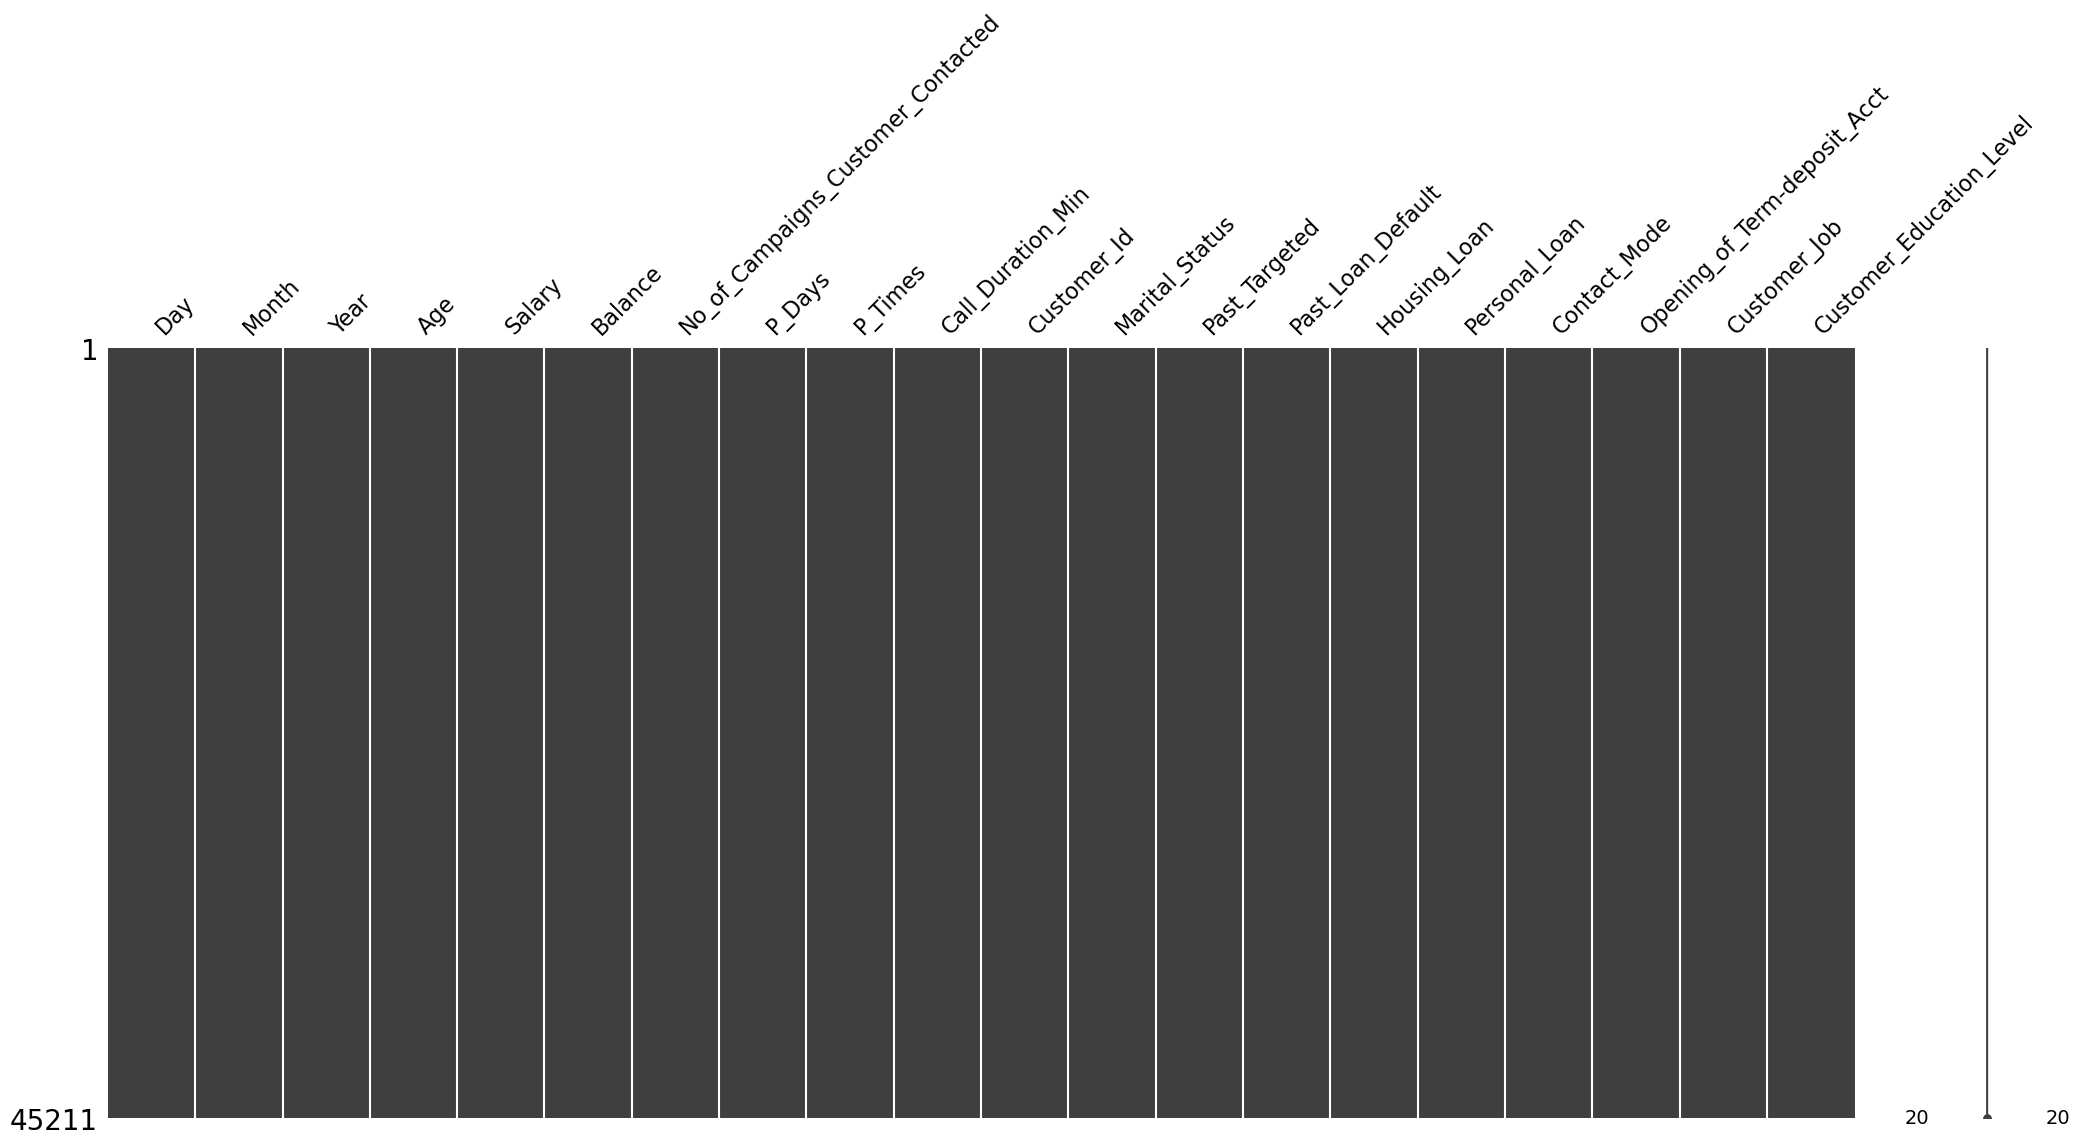

In [157]:
import missingno as msno
msno.matrix(df)
plt.show()

## Data preparation step-6

#### Handling outliers and Check for the normality-

6.1) Outlier handling for Age attribute is as follows-

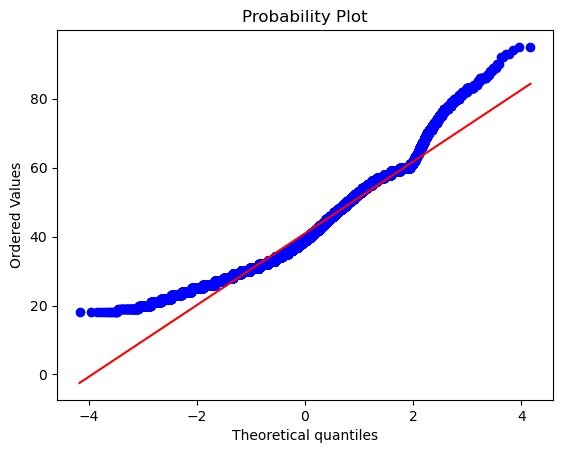

In [159]:
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.show()

The Q-Q Plot indicates that the Age variable is following the normal distribution

<Axes: xlabel='Age'>

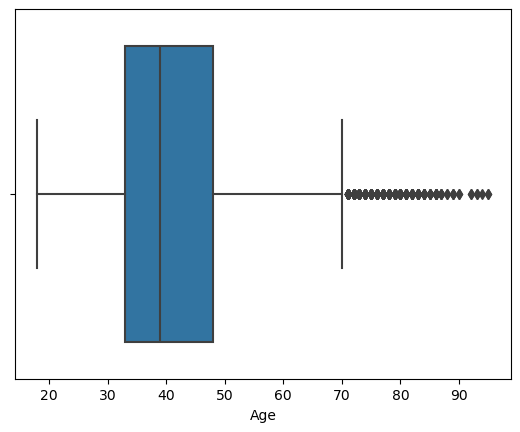

In [161]:
sns.boxplot(data=df, x='Age')

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

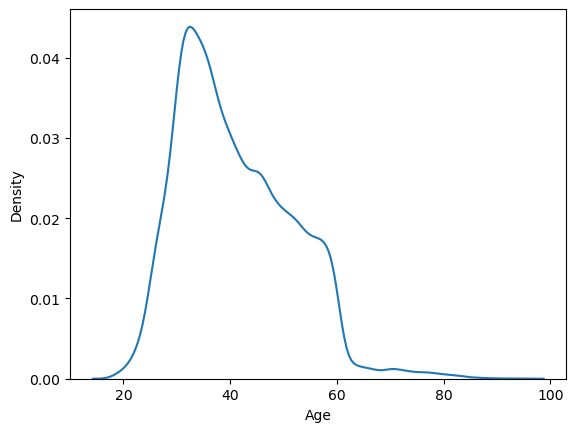

In [163]:
df['Age'].describe()
df['Age'].skew()
sns.kdeplot(data=df, x='Age')

As the outliers are not present proximity to the mean of age attribute, we will use the IQR_Capping method to handle the outliers-

In [165]:
# Limit calculation for IQR-capping method-

Q1=df['Age'].quantile(0.25)
print(Q1)
Q3=df['Age'].quantile(0.75)
print(Q3)

IQR=Q3-Q1
print(IQR)

lower_bound=(Q1-(1.5*IQR)).round(0)
upper_bound=(Q3+(1.5*IQR)).round(0)

print(lower_bound)
print(upper_bound)

33.0
48.0
15.0
10.0
70.0


70.0
18.0


<Axes: xlabel='Age_1'>

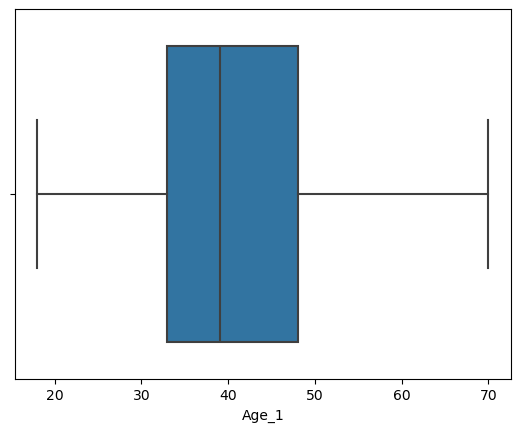

In [175]:
# Outlier handling-

df['Age_1']=np.where(df['Age']>upper_bound,upper_bound,df['Age'])
df['Age_1']=np.where(df['Age_1']<lower_bound,lower_bound,df['Age_1'])

print(df['Age_1'].max())
print(df['Age_1'].min())

sns.boxplot(data=df,x=df['Age_1'])

0.5213752949969322

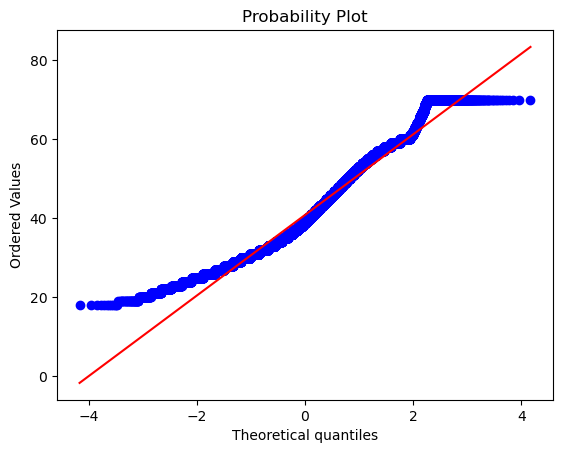

In [177]:
stats.probplot(df['Age_1'],dist='norm',plot=plt)
df['Age_1'].skew()

6.2) Outlier handling and normality check for Salary attribute is as follows-

0.13782909379095207

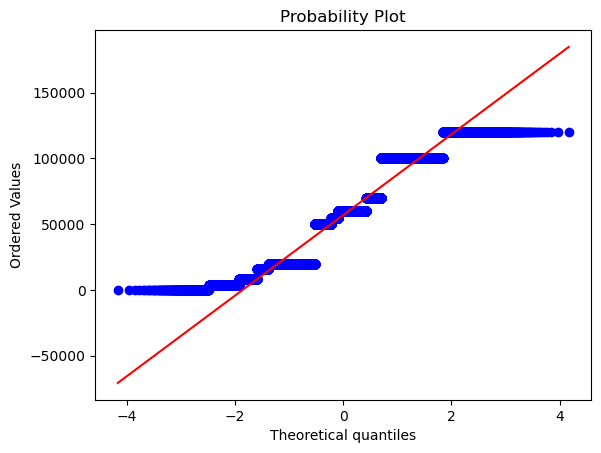

In [179]:
stats.probplot(df['Salary'],dist='norm',plot=plt)
df['Salary'].skew()

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Density'>

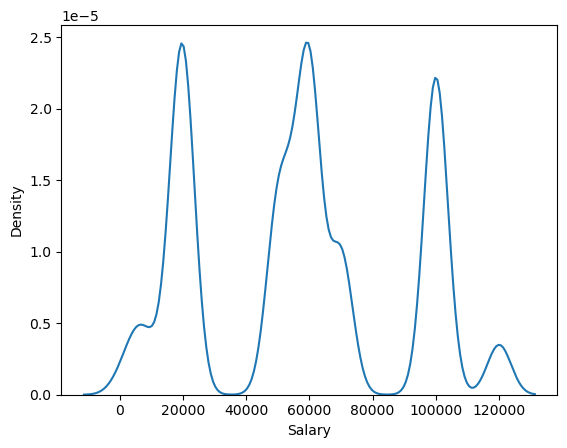

In [181]:
sns.kdeplot(data=df,x=df['Salary'])

The Q-Q Plot and density plot indicates that the Salary variable is not following the normal distribution.

6.3) Outlier handling and normality check for Balance attribute is as follows-

8.360308326166326

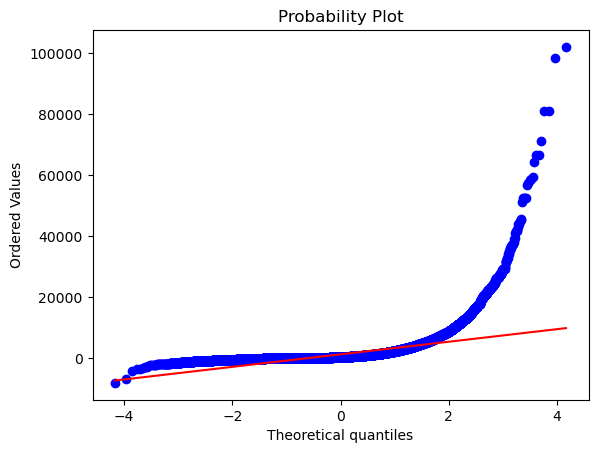

In [183]:
stats.probplot(df['Balance'],dist='norm',plot=plt)
df['Balance'].skew()

<Axes: xlabel='Balance'>

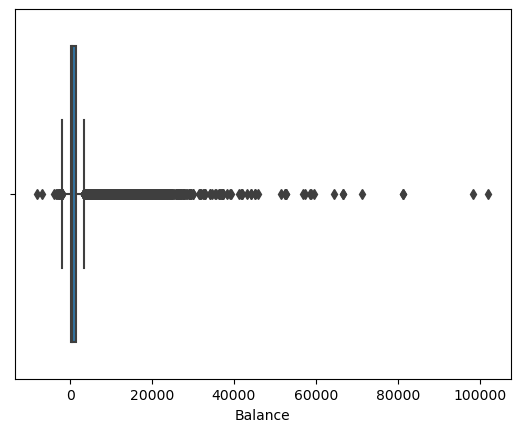

In [381]:
sns.boxplot(data=df,x=df['Balance'])

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


8.360308326166326


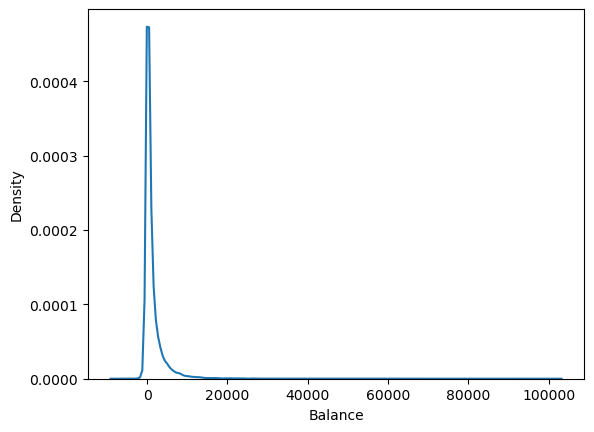

In [185]:
sns.kdeplot(data=df,x=df['Balance'])
print(df['Balance'].skew())

The Balance attribute follows the normal distribution but has high number of outliers, which is generating high skewness in the data.

In [187]:
# Outlier handling using the IQR_Capping method-

Q1=df['Balance'].quantile(0.25)
Q3=df['Balance'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

-1962.0
3462.0


3462.0
-1962.0
1.0978021758668195


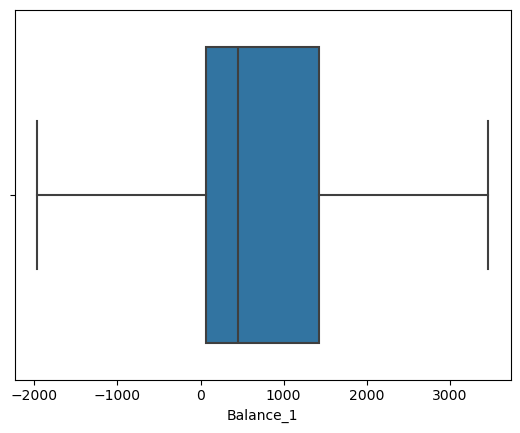

In [193]:
df['Balance_1']=np.where(df['Balance']>upper_bound,upper_bound,df['Balance'])
df['Balance_1']=np.where(df['Balance_1']<lower_bound,lower_bound,df['Balance_1'])

sns.boxplot(data=df, x=df['Balance_1'])
print(df['Balance_1'].max())
print(df['Balance_1'].min())
print(df['Balance_1'].skew())

In [385]:
#df=df[(df['Balance']<upper_bound) & (df['Balance']>lower_bound)]
#df.info()
#As per the IQR method the total no of outliers remains more than 10% of the total values for the Balance attribute, 
#it is advisable not to delete the outliers rather transform them.

1.0978021758668195


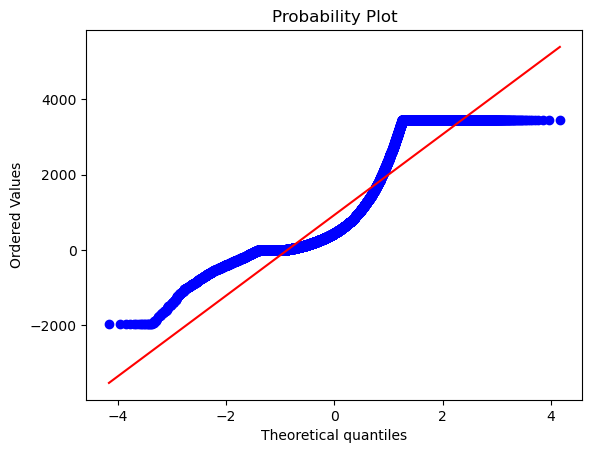

In [195]:
stats.probplot(df['Balance_1'],dist='norm',plot=plt)
print(df['Balance_1'].skew())

<Axes: xlabel='Balance_1', ylabel='Density'>

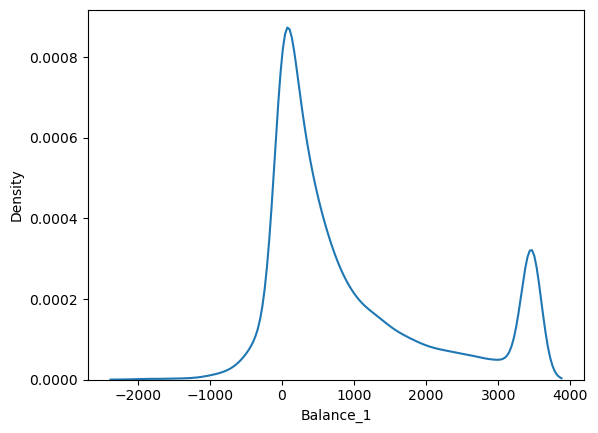

In [387]:
sns.kdeplot(data=df,x=df['Balance_1'])

6.4) Outlier handling and ormality check for No of campaigns customer contacted attribute is as follows-

4.898650166179674


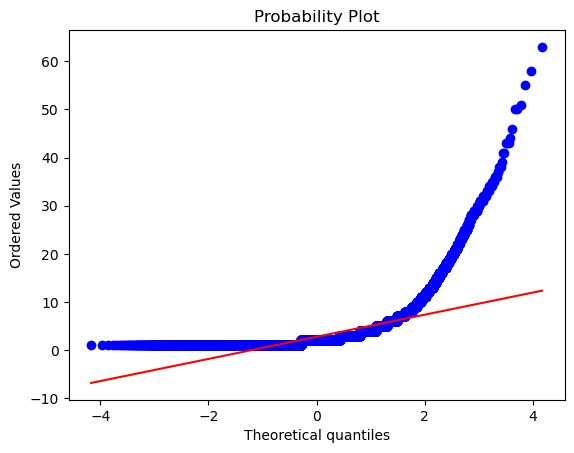

In [197]:
stats.probplot(df['No_of_Campaigns_Customer_Contacted'],dist='norm',plot=plt)
print(df['No_of_Campaigns_Customer_Contacted'].skew())

4.898650166179674

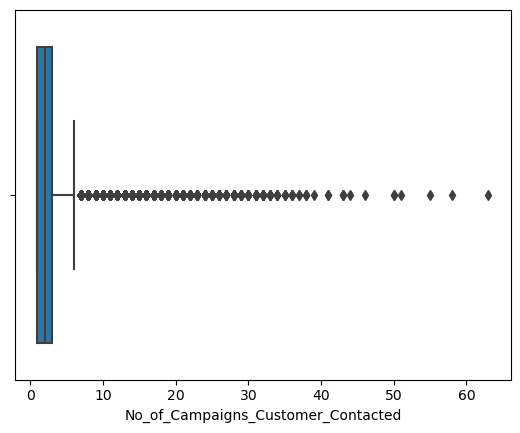

In [199]:
sns.boxplot(data=df,x=df['No_of_Campaigns_Customer_Contacted'])
df['No_of_Campaigns_Customer_Contacted'].skew()

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='No_of_Campaigns_Customer_Contacted', ylabel='Density'>

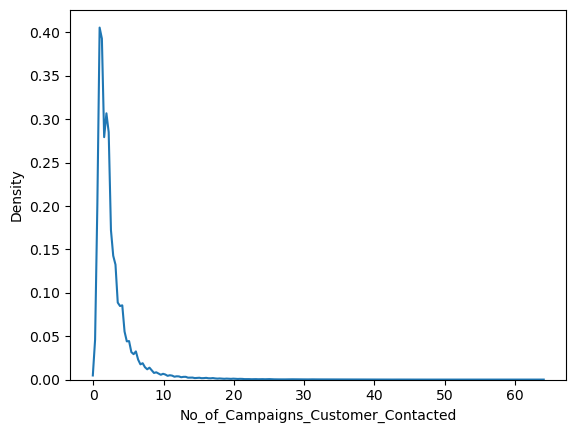

In [201]:
sns.kdeplot(data=df,x=df['No_of_Campaigns_Customer_Contacted'])

-2.0
6.0


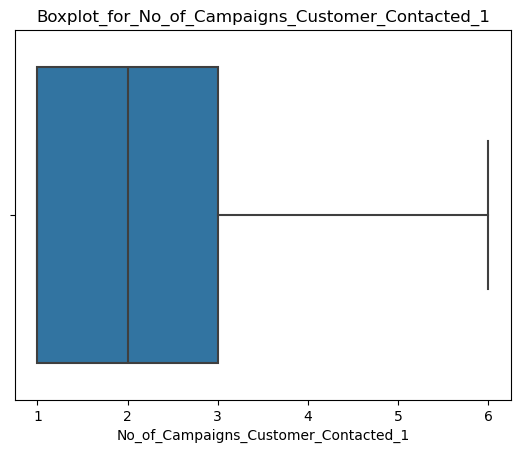

6.0
1.0
1.0991152915287266


In [209]:
# Outlier handling using the IQR_Capping method-

Q1=df['No_of_Campaigns_Customer_Contacted'].quantile(0.25)
Q3=df['No_of_Campaigns_Customer_Contacted'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

#df=df[(df['No_of_Campaigns_Customer_Contacted']<upper_bound) & (df['No_of_Campaigns_Customer_Contacted']>lower_bound)]
#df.shape

#As per the IQR method, the total no of outliers remains more than the 10% of the total attribute observations,
# hence instead of deletion we need to transform them. 

df['No_of_Campaigns_Customer_Contacted_1']=np.where(df['No_of_Campaigns_Customer_Contacted']>upper_bound,upper_bound,df['No_of_Campaigns_Customer_Contacted'])
df['No_of_Campaigns_Customer_Contacted_1']=np.where(df['No_of_Campaigns_Customer_Contacted_1']<lower_bound,lower_bound,df['No_of_Campaigns_Customer_Contacted_1'])

plt.title('Boxplot_for_No_of_Campaigns_Customer_Contacted_1')
sns.boxplot(data=df, x=df['No_of_Campaigns_Customer_Contacted_1'])
plt.show()

print(df['No_of_Campaigns_Customer_Contacted_1'].max())
print(df['No_of_Campaigns_Customer_Contacted_1'].min())
print(df['No_of_Campaigns_Customer_Contacted_1'].skew())

In [211]:
df['No_of_Campaigns_Customer_Contacted_1'].skew()

1.0991152915287266

6.4) Outlier handling and normality check for P_Days attribute is as follows-

<Axes: xlabel='P_Days'>

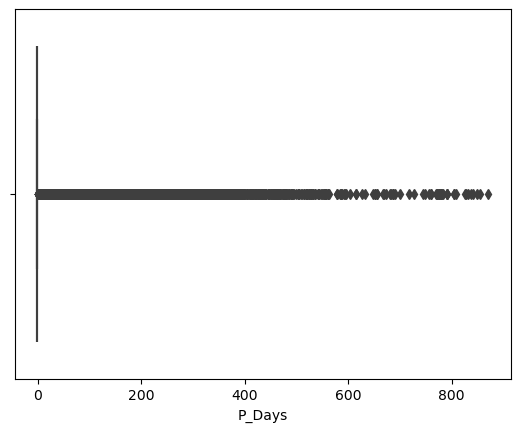

In [213]:
df['P_Days'].skew()
sns.boxplot(data=df,x=df['P_Days'])

2.6157154736563477


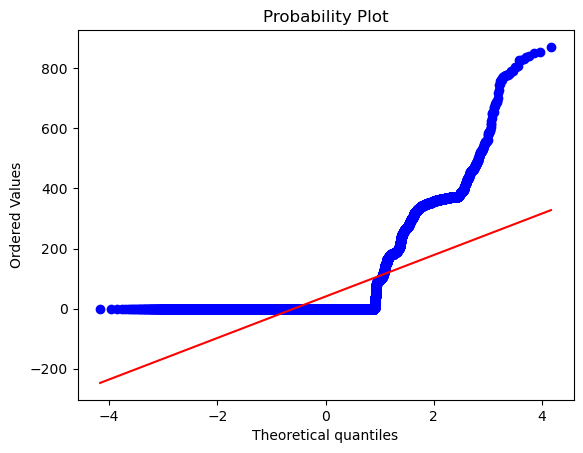

In [215]:
stats.probplot(df['P_Days'],dist='norm',plot=plt)
print(df['P_Days'].skew())

From the Q-Q plot we can conclude that, P-Days variable is not following the normal distribution.

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([ -1., 151., 166.,  91.,  86., 143., 147.,  89., 140., 176., 101.,
       174., 170., 167., 195., 165., 129., 188., 196., 172., 118., 119.,
       104., 171., 117., 164., 132., 131., 123., 159., 186., 111., 115.,
       116., 173., 178., 110., 152.,  96., 103., 150., 175., 193., 181.,
       185., 154., 145., 138., 126., 180., 109., 158., 168.,  97., 182.,
       127., 130., 194., 125., 105., 102.,  26., 179.,  28., 183., 155.,
       112., 120., 137., 124., 187., 190., 113., 162., 134., 169., 189.,
         8., 144., 191., 184., 177.,   5.,  99., 133.,  93.,  92.,  10.,
       100., 156., 198., 106., 153., 146., 128.,   7., 121., 160., 107.,
        90.,  27., 197., 136., 139., 122., 157., 149., 135.,  30., 114.,
        98., 192., 163.,  34.,  95., 141.,  31., 199.,  94., 108.,  29.,
       268., 247., 253., 226., 244., 239., 245., 204., 231., 238., 258.,
       230., 254., 265.,  71., 223., 246., 250., 266., 240., 205., 261.,
       259., 241., 260., 234., 251., 225., 161., 23

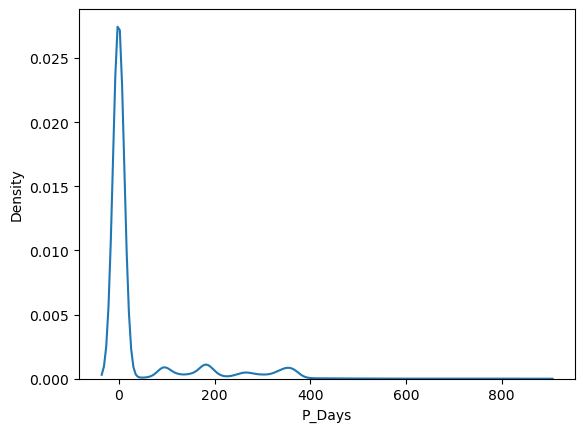

In [217]:
sns.kdeplot(data=df,x=df['P_Days'])
df['P_Days'].unique()

6.5) Outlier handling and normality check for P_Times attribute is as follows-

<Axes: xlabel='P_Times'>

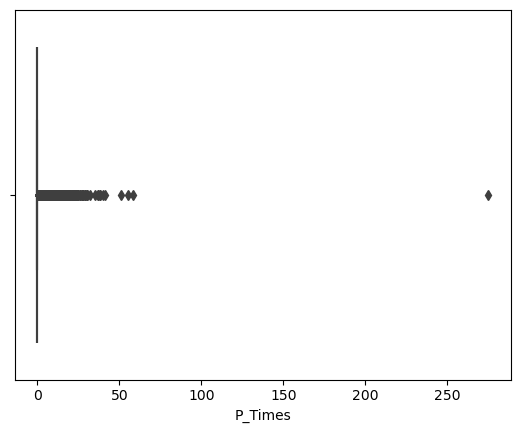

In [219]:
df['P_Times'].skew()
sns.boxplot(data=df,x=df['P_Times'])

41.84645447266292


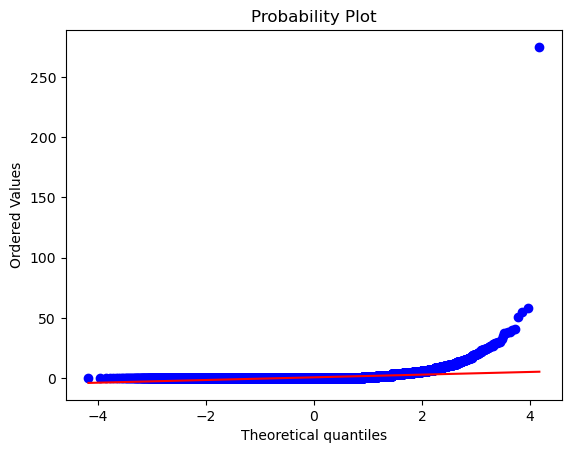

In [397]:
stats.probplot(df['P_Times'],dist='norm',plot=plt)
print(df['P_Times'].skew())

0    0.0
Name: P_Times, dtype: float64

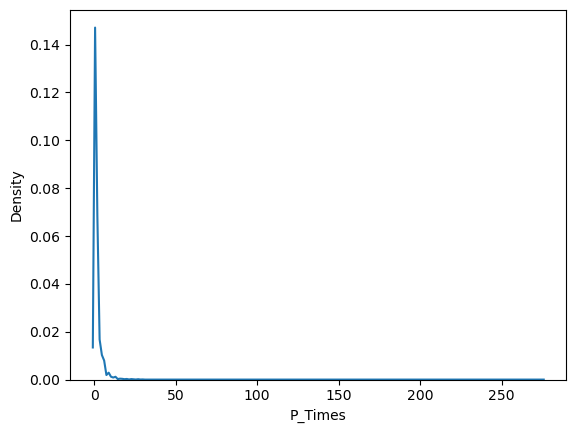

In [398]:
sns.kdeplot(data=df,x=df['P_Times'])
df['P_Times'].mode()

From the above plots we can conclude that P_Times attribute is not following the normal distribution.

6.6) Outlier handling for Call_Duration_Min attribute is as follows-

<Axes: xlabel='Call_Duration_Min'>

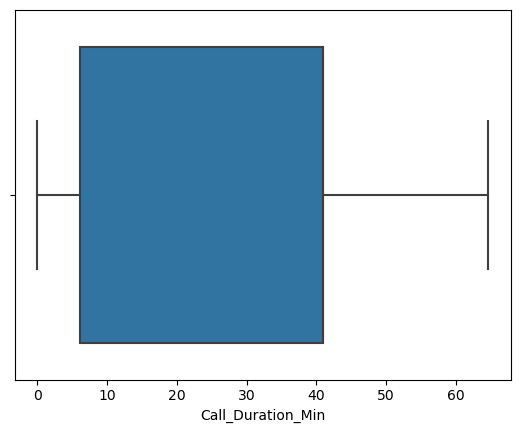

In [221]:
df['Call_Duration_Min'].skew()
sns.boxplot(data=df,x=df['Call_Duration_Min'])

3.1443148038706252


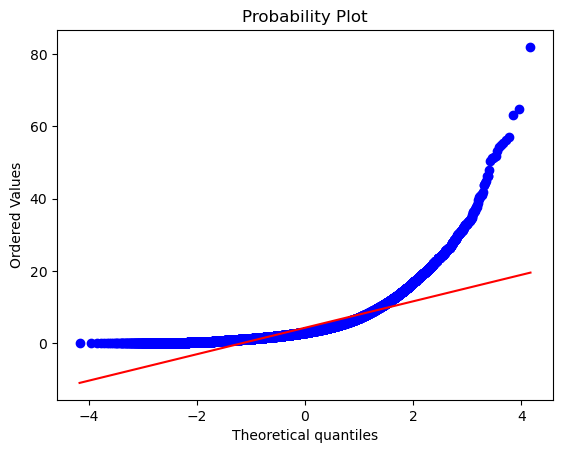

In [400]:
stats.probplot(df['Call_Duration_Min'],dist='norm',plot=plt)
print(df['Call_Duration_Min'].skew())

<Axes: xlabel='Call_Duration_Min', ylabel='Density'>

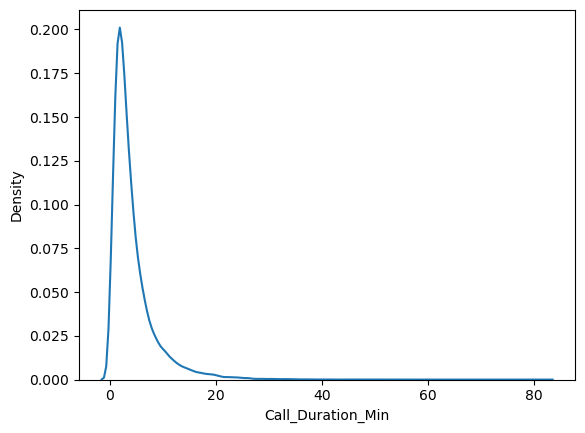

In [401]:
sns.kdeplot(data=df,x=df['Call_Duration_Min'])

-46.19514302257824
93.21412725985263
64.68333333333334
0.0
-0.8565792515689119


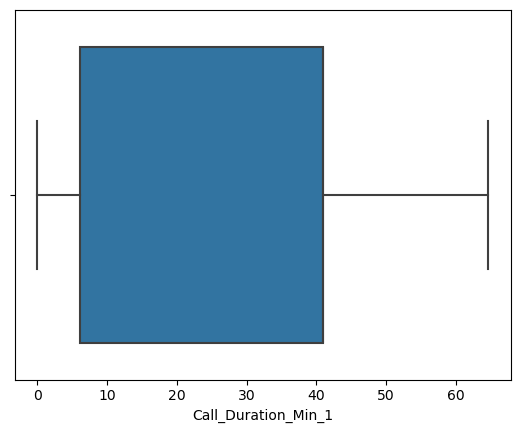

In [233]:
# Outlier handling using the IQR_Capping method-

Q1=df['Call_Duration_Min'].quantile(0.25)
Q3=df['Call_Duration_Min'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Call_Duration_Min_1']=np.where(df['Call_Duration_Min']>upper_bound,upper_bound,df['Call_Duration_Min'])
df['Call_Duration_Min_1']=np.where(df['Call_Duration_Min_1']<lower_bound,lower_bound,df['Call_Duration_Min_1'])

sns.boxplot(data=df, x=df['Call_Duration_Min_1'])
print(df['Call_Duration_Min_1'].max())
print(df['Call_Duration_Min_1'].min())
print(df['Call_Duration_Min_1'].skew())

In [403]:
#df = df[(df['Call_Duration_Min'] >= lower_bound) & (df['Call_Duration_Min'] <= upper_bound)]
#df.info()

# Again as more than 10% of the observations are showcasing the presence of outliers, so removing them is not feasible as,
# this deletion of observations will impact the predictions.

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Call_Duration_Min_1', ylabel='Density'>

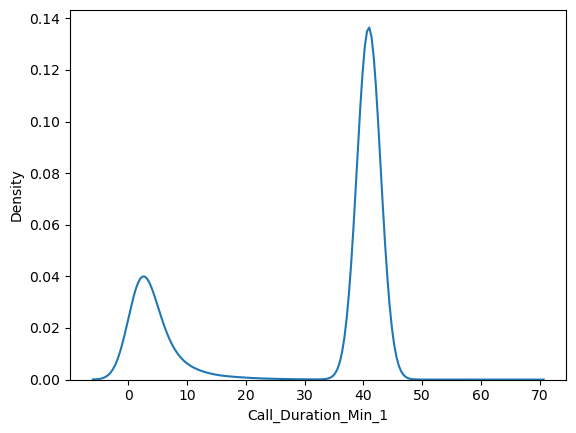

In [235]:
sns.kdeplot(data=df, x=df['Call_Duration_Min_1'])

As for all the continuous attributes present in the data, the variables are present far away from the mean/median(i.e. distributed extremely) and observations showcased high deviation we used the IQR/capping/flooring method, instead of the z-score and log transformation method.   

### Date preparation step-7

#### Duplicate Removal and creation of final dataframe for further analysis-

In [223]:
df
df.drop_duplicates()
df.duplicated().sum()

0

In [227]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
1,,,,,,,,,,,,,,,,,,,,,
Day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
Month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Age,58.0,44.0,33.0,47.0,33.0,35.0,28.0,42.0,58.0,43.0,...,53.0,34.0,23.0,73.0,25.0,51.0,71.0,72.0,57.0,37.0
Salary,100000.0,60000.0,120000.0,20000.0,0.0,100000.0,100000.0,120000.0,55000.0,60000.0,...,100000.0,50000.0,4000.0,55000.0,60000.0,60000.0,55000.0,55000.0,20000.0,120000.0
Balance,2143.0,29.0,2.0,1506.0,1.0,231.0,447.0,2.0,121.0,593.0,...,583.0,557.0,113.0,2850.0,505.0,825.0,1729.0,5715.0,668.0,2971.0
No_of_Campaigns_Customer_Contacted,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,3.0,2.0,5.0,4.0,2.0
P_Days,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,184.0,-1.0,-1.0,40.0,-1.0,-1.0,-1.0,184.0,-1.0,188.0
P_Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,8.0,0.0,0.0,0.0,3.0,0.0,11.0


### Final dataframe after handling the missing values, outliers, and duplicates is given as below- 

In [245]:
df_cont_n=df[['Age_1','Salary','Balance_1','No_of_Campaigns_Customer_Contacted_1','Call_Duration_Min_1','P_Days','P_Times']]
df_cont_n.T

df=pd.concat([df_datetime_final,df_cat,df_cont_n],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day                                   45211 non-null  int32  
 1   Month                                 45211 non-null  object 
 2   Year                                  45211 non-null  int32  
 3   Customer_Id                           45211 non-null  object 
 4   Marital_Status                        45211 non-null  object 
 5   Past_Targeted                         45211 non-null  object 
 6   Past_Loan_Default                     45211 non-null  object 
 7   Housing_Loan                          45211 non-null  object 
 8   Personal_Loan                         45211 non-null  object 
 9   Contact_Mode                          45211 non-null  object 
 10  Opening_of_Term-deposit_Acct          45211 non-null  object 
 11  Customer_Job   

## Objective(2)- Descriptive Statistics

### 2) a. Derive summary statistics (mean, median, standard deviation) for relevant columns-

In [247]:
#The measures of central tendencies & dispersion are calculated for the continiuos variables-


print('The mean of the continuous variables is as follows-',df_cont_n.mean().round(2))
print('The median of the continuous variables is as follows-',df_cont_n.median().round(2))
print('The mode of the continuous variables is as follows-',df_cont_n.mode().T)
print('The standard deviation of the continuous variables is as follows-',df_cont_n.std().round(2))
print('The variance of the continuous variables is as follows-',df_cont_n.var().round(2))
print('The skewness of the continuous variables is as follows-',df_cont_n.skew().round(2))
print('The kurtosis of the continuous variables is as follows-',df_cont_n.kurt().round(2))
df_cont_n.describe().round(2).T

The mean of the continuous variables is as follows- 1
Age_1                                      40.86
Salary                                  57006.17
Balance_1                                 933.71
No_of_Campaigns_Customer_Contacted_1        2.39
Call_Duration_Min_1                        29.49
P_Days                                     40.20
P_Times                                     0.58
dtype: float64
The median of the continuous variables is as follows- 1
Age_1                                      39.00
Salary                                  60000.00
Balance_1                                 448.00
No_of_Campaigns_Customer_Contacted_1        2.00
Call_Duration_Min_1                        40.94
P_Days                                     -1.00
P_Times                                     0.00
dtype: float64
The mode of the continuous variables is as follows-                                                  0
1                                                 
Age_1               

,count,mean,std,min,25%,50%,75%,max
1,,,,,,,,
Age_1,45211.0,40.86,10.38,18.0,33.00,39.00,48.00,70.00
Salary,45211.0,57006.17,32085.72,0.0,20000.00,60000.00,70000.00,120000.00
Balance_1,45211.0,933.71,1176.77,-1962.0,72.00,448.00,1428.00,3462.00
No_of_Campaigns_Customer_Contacted_1,45211.0,2.39,1.60,1.0,1.00,2.00,3.00,6.00
Call_Duration_Min_1,45211.0,29.49,17.15,0.0,6.08,40.94,40.94,64.68
P_Days,45211.0,40.20,100.13,-1.0,-1.00,-1.00,-1.00,871.00
P_Times,45211.0,0.58,2.30,0.0,0.00,0.00,0.00,275.00


### 2) b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.

To understand the distribution of target variable (Categorical in nature) indicating responses to the term deposit campaign, we have used countplot.
Note-Here the target variable (Dependent_variable) indicating responses to the term deposit campaign is considered/renamed as
Opening_of_Term-deposit_Acct.

count     45211
unique        2
top          no
freq      39924
Name: Opening_of_Term-deposit_Acct, dtype: object


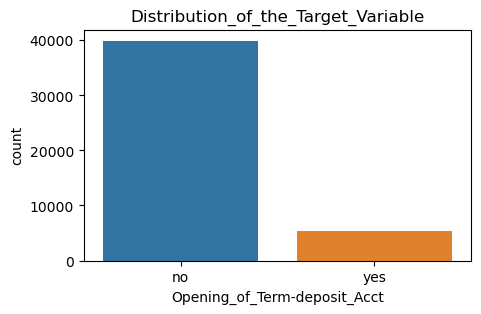

In [249]:
print(df_cat['Opening_of_Term-deposit_Acct'].describe())

plt.figure(figsize=(5, 3))
plt.title('Distribution_of_the_Target_Variable')
sns.countplot(data=df, x=df['Opening_of_Term-deposit_Acct'])
plt.show()

In [251]:
# To understand the overall effectiveness of the term deposit opening campaign,
# we have used the crosstab against a Past_Targeted(Particular cusomer before targetted or not) attribute.

crosstab = pd.crosstab(df['Past_Targeted'], df['Opening_of_Term-deposit_Acct'])
print(crosstab)

Opening_of_Term-deposit_Acct     no   yes
Past_Targeted                            
no                             6786  1334
yes                           33138  3953


#### Conclusions derived for objective(2)- 

1. The median age of the clientale 39 years, salary-60,000, Balance in the account- 448.0, and Salary mode-20,000.0
2. The above mentioned investor segment is will less likely to open term deposits, as they require liquidity for expenses. 
3. This indicates that the present customer segment targetted by the company is moderately inappropriate, 
and company might require to think about segmentation, targetting, and positioning for it's market offering.
4. Every cosutomer is targetted with 2 number of campaigns, with a call duration of 3 mins, still the frequency of account opening is very low (39,924).
5. Hence, there might be a problem with understnading the proper customer need mapping/segmentation/ inadequate communication channel. 


## Objective(3)- Univariate Analysis

### 3) a. Examine the distribution of individual key features, such as age, balance, and call duration.

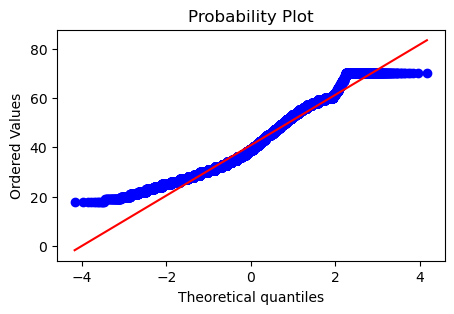

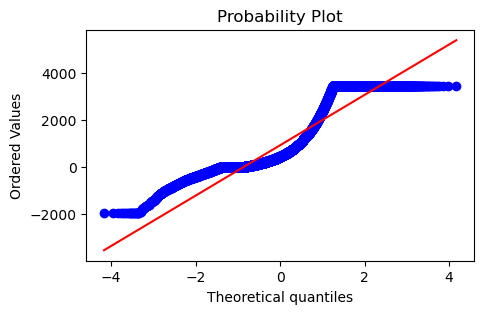

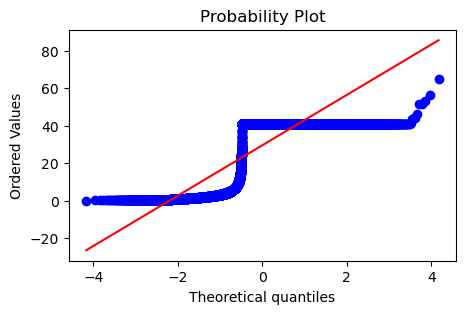

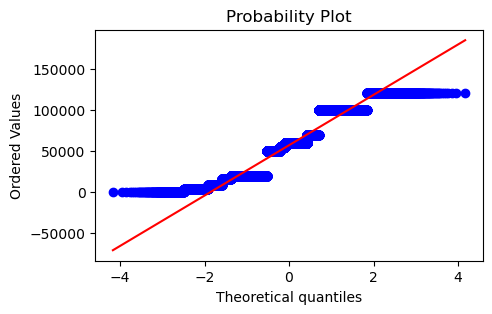

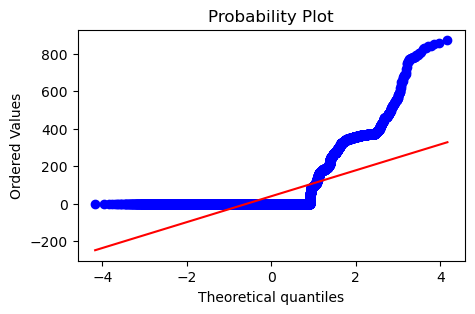

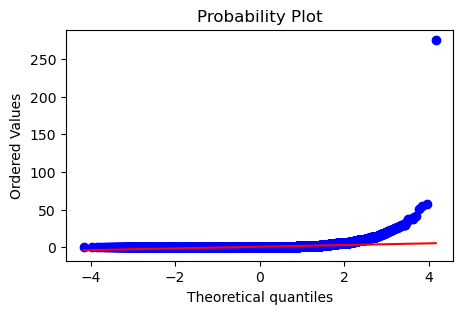

In [258]:
# Q-Q (Quantile-Quantile) plot for the age Attribute-

plt.figure(figsize=(5,3))
stats.probplot(df_cont_n['Age_1'],dist='norm', plot=plt)
plt.show()

# Q-Q (Quantile-Quantile) plot for the balance attribute-

plt.figure(figsize=(5,3))
stats.probplot(df_cont_n['Balance_1'],dist='norm', plot=plt)
plt.show()

# Q-Q (Quantile-Quantile) plot for the call duration attribute-

plt.figure(figsize=(5,3))
stats.probplot(df_cont_n['Call_Duration_Min_1'],dist='norm', plot=plt)
plt.show()


# Q-Q (Quantile-Quantile) plot for the salary attribute-

plt.figure(figsize=(5,3))
stats.probplot(df_cont_n['Salary'],dist='norm', plot=plt)
plt.show()

# Q-Q (Quantile-Quantile) plot for the P_Days_1 attribute-

plt.figure(figsize=(5,3))
stats.probplot(df_cont_n['P_Days'],dist='norm', plot=plt)
plt.show()

# Q-Q (Quantile-Quantile) plot for the P_Time_1 attribute-

plt.figure(figsize=(5,3))
stats.probplot(df_cont_n['P_Times'],dist='norm', plot=plt)
plt.show()

### 3) b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

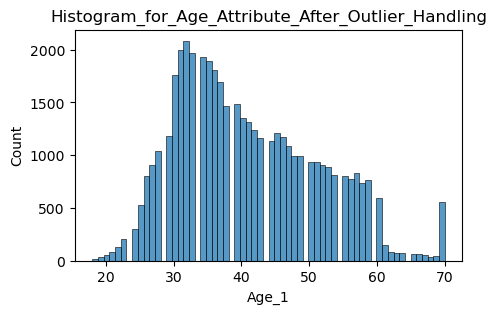

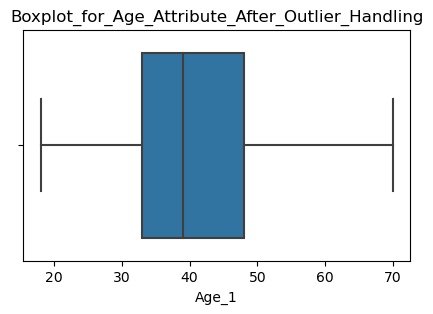

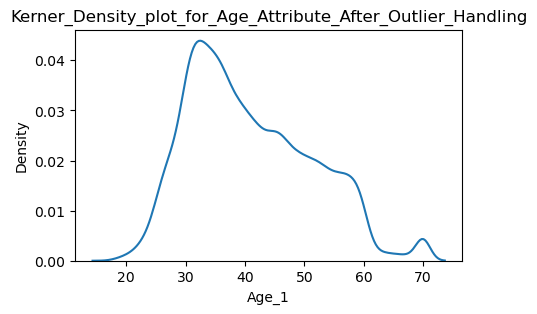

Skewness_of_the_Age_Attribute_After_Outlier_Handling:- 0.52


In [412]:
# Plots after handling the outliers(Age_1)-

plt.figure(figsize=(5,3))
plt.title("Histogram_for_Age_Attribute_After_Outlier_Handling")
sns.histplot(data=df_cont_n,x=df_cont_n['Age_1'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Boxplot_for_Age_Attribute_After_Outlier_Handling")
sns.boxplot(data=df_cont_n,x=df_cont_n['Age_1'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Kerner_Density_plot_for_Age_Attribute_After_Outlier_Handling")
sns.kdeplot(data=df_cont_n,x=df_cont_n['Age_1'])
plt.show()

print('Skewness_of_the_Age_Attribute_After_Outlier_Handling:-',df_cont_n['Age_1'].skew().round(2))

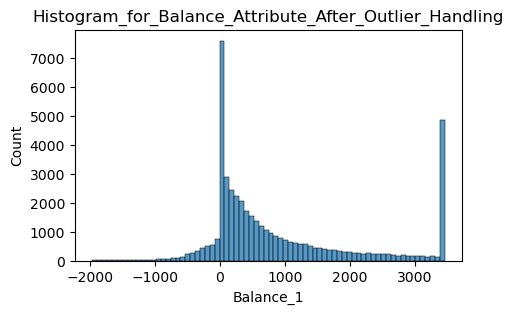

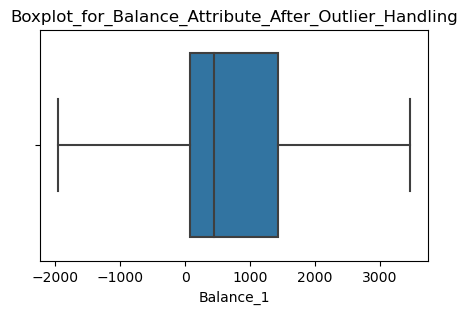

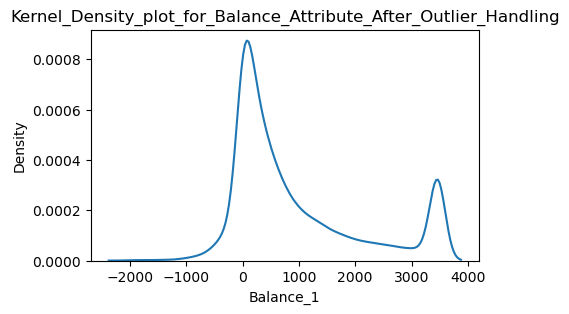

Skewness_of_the_Balance_Attribute_After_Outlier_Handling:- 1.1


In [413]:
# Plots after handling the outliers (Balance_1)-

plt.figure(figsize=(5,3))
plt.title("Histogram_for_Balance_Attribute_After_Outlier_Handling")
sns.histplot(data=df_cont_n,x=df_cont_n['Balance_1'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Boxplot_for_Balance_Attribute_After_Outlier_Handling")
sns.boxplot(data=df_cont_n,x=df_cont_n['Balance_1'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Kernel_Density_plot_for_Balance_Attribute_After_Outlier_Handling")
sns.kdeplot(data=df_cont_n,x=df_cont_n['Balance_1'])
plt.show()

print('Skewness_of_the_Balance_Attribute_After_Outlier_Handling:-',df_cont_n['Balance_1'].skew().round(2))

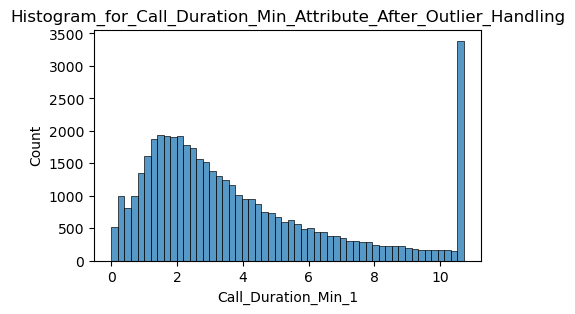

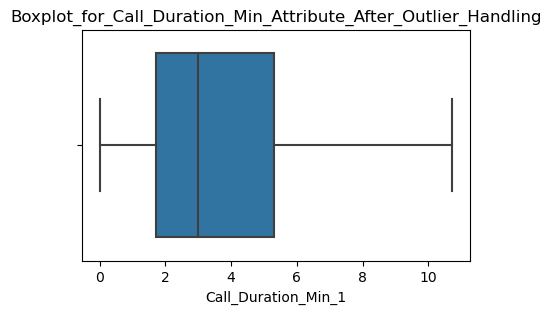

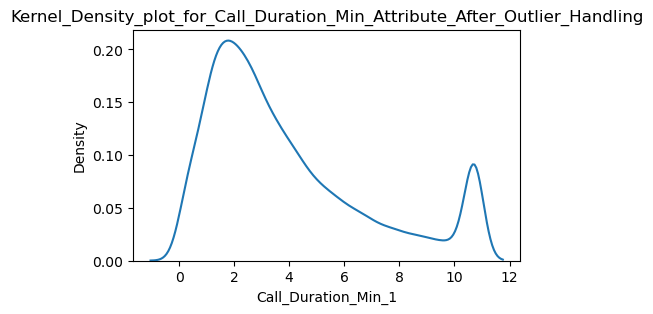

Skewness_of_the_Call_Duration_Min_Attribute_After_Outlier_Handling:- 1.04


In [414]:
# Plots after handling the outliers (Call_Duration_Min_1)-

plt.figure(figsize=(5,3))
plt.title("Histogram_for_Call_Duration_Min_Attribute_After_Outlier_Handling")
sns.histplot(data=df_cont_n,x=df_cont_n['Call_Duration_Min_1'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Boxplot_for_Call_Duration_Min_Attribute_After_Outlier_Handling")
sns.boxplot(data=df_cont_n,x=df_cont_n['Call_Duration_Min_1'])
plt.show()

plt.figure(figsize=(5,3))
plt.title("Kernel_Density_plot_for_Call_Duration_Min_Attribute_After_Outlier_Handling")
sns.kdeplot(data=df_cont_n,x=df_cont_n['Call_Duration_Min_1'])
plt.show()

print('Skewness_of_the_Call_Duration_Min_Attribute_After_Outlier_Handling:-',df_cont_n['Call_Duration_Min_1'].skew().round(2))

#### Conclusion for Objective(3)- 

1. Only the Age_1, Balance_1, and Call_Duration_Min_1 continuous variables follows the normal distribution.
2. As outliers are present with more than 10% of the data for each attribute, it is imperative to adjust them rather than dropping.
3. After adjusting these outliers the skewness of normal distribution got reduced, and comes close to the acceptable range. 

## Objective(4)- Bivariate Analysis

### 4).a- Evaluate the relationship between independent variables and the target variable.

##### Bivariate analysis between all the categorical variables and dependent categorical variable(Opening_of_Term-deposit_Account)

For Independent Variables Categorical in Nature- (Variables that are impacting the decision of term-deosit account opening)
1. Marital_Status
2. Past_Targeted-Imp
3. Past_Loan_Default
4. Housing_Loan
5. Personal_Loan
6. Contact_Mode-Imp
7. Previous_Contact_Outcome-Imp
8. Customer_Job
9. Customer_Education_Level

For Dependent Variable Categorical in Nature-
1. Opening_of_Term-deposit_Acct

In [415]:
#crosstab_1 and crosstab_2 indicates the relationship between target variable and variables used to asses the telemarketing campaign.

crosstab_1 = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Contact_Mode']])
crosstab_1.T

Opening_of_Term-deposit_Acct,no,yes
Contact_Mode,,
cellular,24918,4367
telephone,2516,390
unknown,12490,530


In [416]:
crosstab_2 = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Past_Targeted'],df['Previous_Contact_Outcome']])
crosstab_2.T

Opening_of_Term-deposit_Acct               no   yes
Past_Targeted Previous_Contact_Outcome             
no            failure                     735   163
              other                       268    69
              success                     135   274
              unknown                    5648   828
yes           failure                    3548   455
              other                      1265   238
              success                     398   704
              unknown                   27927  2556

In [417]:
#Crosstab_3 indicates the relationship between loan portfolio and past loan history of the customer and term account opening frequency-

crosstab_3 = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Past_Loan_Default'],df['Housing_Loan'],df['Personal_Loan']])
crosstab_3.T

Opening_of_Term-deposit_Acct                     no   yes
Past_Loan_Default Housing_Loan Personal_Loan             
no                no           no             13873  3119
                               yes             2498   211
                  yes          no             18814  1647
                               yes             3976   258
yes               no           no               197    15
                               yes              160     8
                  yes          no               280    22
                               yes              126     7

In [418]:
#Crosstab_4 and 5 indicates overall employability/education/Job of the customer and frequency of acoount oening-

crosstab_4 = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Customer_Job']])
crosstab_4.T

Opening_of_Term-deposit_Acct,no,yes
Customer_Job,,
admin.,4541,630
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1393,186
services,3785,369
student,669,269


In [419]:
crosstab_5 = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Customer_Education_Level']])
crosstab_5.T

Opening_of_Term-deposit_Acct,no,yes
Customer_Education_Level,,
primary,6260,591
secondary,20753,2449
tertiary,11306,1995
unknown,1605,252


##### Bivariate analysis between all the continuous variables and dependent categorical variable(Opening_of_Term-deposit_Account)-

For Independent Variables Continuous in Nature- (Variables that are impacting the decision of term-deosit account opening)
1. Age_1
2. Balance_1
3. Call_Duration_Min_1

For Dependent Variable Categorical in Nature-
1. Opening_of_Term-deposit_Acct

In [420]:
x=df.groupby(['Opening_of_Term-deposit_Acct'])['Call_Duration_Min_1'].median()
x

Opening_of_Term-deposit_Acct
no     2.73
yes    7.10
Name: Call_Duration_Min_1, dtype: float64

In [421]:
x=df.groupby(['Opening_of_Term-deposit_Acct'])['Age_1'].median()
x

Opening_of_Term-deposit_Acct
no     39.0
yes    38.0
Name: Age_1, dtype: float64

In [422]:
x=df.groupby(['Opening_of_Term-deposit_Acct'])['Balance_1'].median()
x

Opening_of_Term-deposit_Acct
no     417.0
yes    733.0
Name: Balance_1, dtype: float64

In [423]:
x=df.groupby(['Opening_of_Term-deposit_Acct'])['No_of_Campaigns_Customer_Contacted_1'].median()
x

Opening_of_Term-deposit_Acct
no     2.0
yes    2.0
Name: No_of_Campaigns_Customer_Contacted_1, dtype: float64

### 4).b Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.

<Axes: xlabel='count', ylabel='Customer_Job'>

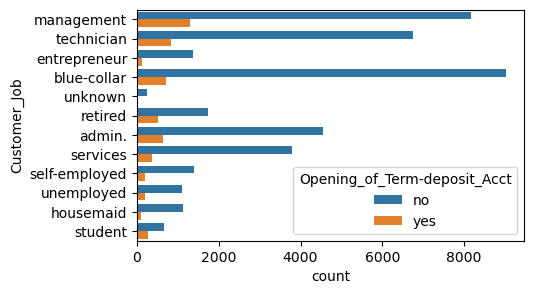

In [424]:
#Success of term deposit campaign based on job type of the customer

plt.figure(figsize=(5,3))
sns.countplot(data=df,hue=df['Opening_of_Term-deposit_Acct'],y=df['Customer_Job'])

<Axes: xlabel='Customer_Education_Level', ylabel='count'>

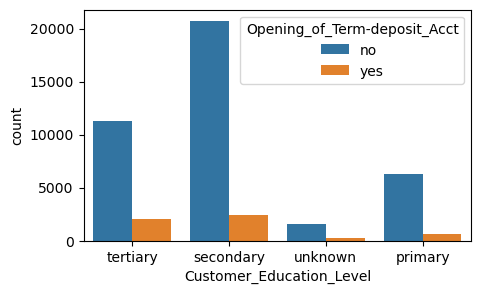

In [425]:
#Success of term deposit campaign based on education level of the customer

plt.figure(figsize=(5,3))
sns.countplot(data=df,hue=df['Opening_of_Term-deposit_Acct'],x=df['Customer_Education_Level'])

<Axes: xlabel='Marital_Status', ylabel='count'>

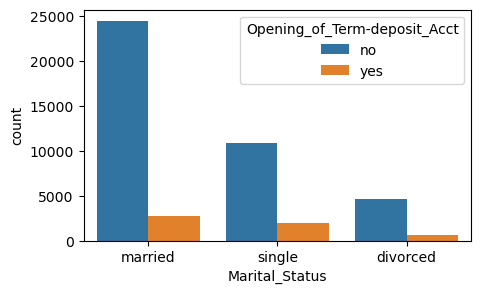

In [426]:
#Success of term deposit campaign based on marital status of the customer

plt.figure(figsize=(5,3))
sns.countplot(data=df,hue=df['Opening_of_Term-deposit_Acct'],x=df['Marital_Status'])

#### Conclusion for Objective 4-

1. Customer contacted through cellular contact mode resulted in more term account openings.
2. Targetted customers with no past loan default, same for the housing and personal loan opens term account i.e. showed positive side towards telemarketing campaign.
3. Clients with management job type, technician, blue-collar, and admin workers opened more term accounts.
4. Potential customers with secondary education level opened more accounts.
5. The average call duration time for account opening decision remained significantly different, hence there is a relationship between time duration and conversion.
6. The average age for account opening and closing remained close to each other.
7. Customers who have high balance, opened accounts as compared with lower balance customers.
8. No of campaigns by which customers are contacted does not showcased any relatoionship with term account opening.

## Objective(5)- Categorical Variables Analysis 

### 5).a- Investigate the distribution of categorical variables such as job type, education, and marital status.

<Axes: xlabel='count', ylabel='Customer_Job'>

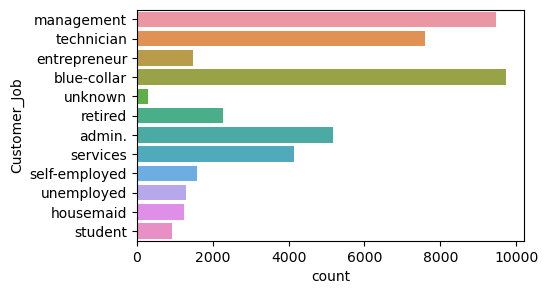

In [427]:
# Distribution of attribute Job Type-

plt.figure(figsize=(5,3))
sns.countplot(data=df,y=df['Customer_Job'])

<Axes: xlabel='Customer_Education_Level', ylabel='count'>

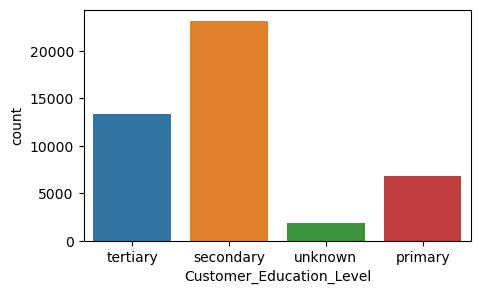

In [428]:
# Distribution of attribute Education-

plt.figure(figsize=(5,3))
sns.countplot(data=df,x=df['Customer_Education_Level'])

<Axes: xlabel='count', ylabel='Marital_Status'>

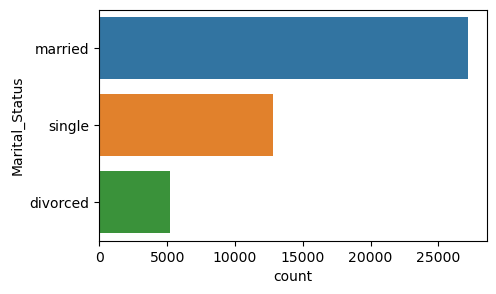

In [429]:
# Distribution of attribute marital status-

plt.figure(figsize=(5,3))
sns.countplot(data=df,y=df['Marital_Status'])

### 5)-b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts. [This analysis is covered under objective 4.b]

#### Conclusion for objective 5-

1. Most of the customer targetted holds job as/in management, technician, blue collar, admin, and services.
2. Most of the targetted customers have completed their secondary education only, followed by tertiary education.
3. Most of the targetted customers are married.

## Objective(6)- Temporal Analysis

### 6)-a. Investigate temporal patterns in the success of the campaign over time.
### 6)-b. Analyze if specific months or days exhibit superior campaign performance.

Opening_of_Term-deposit_Acct,no,yes
Month,,
may,12867,930
jul,6262,626
aug,5552,688
jun,4791,544
nov,3565,403
apr,2354,577
feb,2207,439
jan,1260,142
oct,415,323


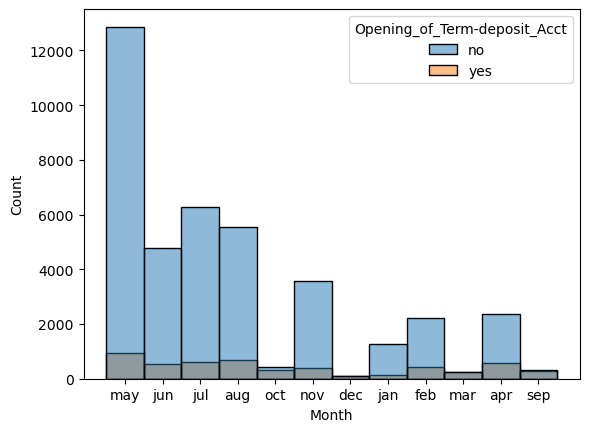

In [430]:
sns.histplot(data=df,hue=df['Opening_of_Term-deposit_Acct'],
             x=df['Month'])

crosstab_a = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Month']])
crosstab_a.T

crosstab_sorted_columns=crosstab_a[crosstab_a.sum().sort_values(ascending=False).index]
crosstab_sorted_columns.T

In [431]:
crosstab_b = pd.crosstab(
    index=[df['Opening_of_Term-deposit_Acct']],
    columns=[df['Day']])
crosstab_b.T

crosstab_sorted_columns_1=crosstab_b[crosstab_b.sum().sort_values(ascending=False).index]
crosstab_sorted_columns_1.T

Opening_of_Term-deposit_Acct,no,yes
Day,,
20,11066,3409
21,1762,118
19,1577,73
28,1554,59
29,1544,45
18,1436,108
17,1417,96
6,1294,81
9,1302,72


#### Conclusion for objective 6-

1. Campaign is run heavily in the May, June, July, and August month. But the conversion rate during the same month is very low.
2. In the October, December, March, and september, campaign have not run so heavily. Still these month showcased the higher term-deposit opening.
3. March month exhibits higher percentage of customers opening the term-deposit accounts, as compare to rejections across the year.
4. May month has highest no of rejections/negative resonse as compared to total customers targetted. 
5. Middle dates of month generally offers good response, as the customers might have generated sufficient balance after paying the monthly dues.

## Objective(7)- Feature Engineering

### 7)-a. Introduce new features that may enhance prediction, such as creating age groups or income categories.
### 7)-b. Apply encoding techniques to transform categorical variables if necessary.

In [432]:
# Assigning values to the categorical variable (Opening_of_Term-deposit_Acct)-[1-Yes and 0-No]

df['Opening_of_Term-deposit_Acct_Num'] = pd.Categorical(df['Opening_of_Term-deposit_Acct']).codes
df['Opening_of_Term-deposit_Acct_Num'].unique()

array([0, 1], dtype=int8)

<Axes: xlabel='count', ylabel='Opening_of_Term-deposit_Acct'>

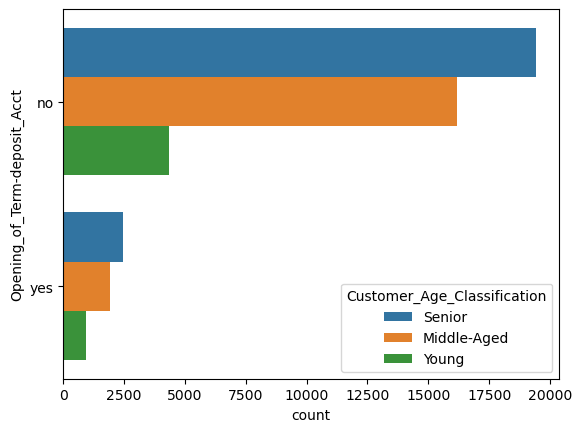

In [433]:
df['Customer_Age_Classification']=np.where(df['Age_1']<30,'Young',np.where(df['Age_1']<40,'Middle-Aged','Senior'))
df['Customer_Age_Classification'].unique()

sns.countplot(data=df,hue=df['Customer_Age_Classification'],y=df['Opening_of_Term-deposit_Acct'])

<Axes: xlabel='Salary', ylabel='Count'>

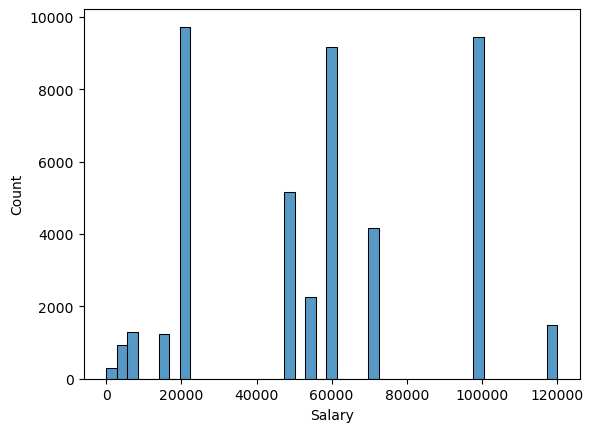

In [434]:
sns.histplot(data=df,x=df['Salary'])

<Axes: xlabel='Balance_1', ylabel='Count'>

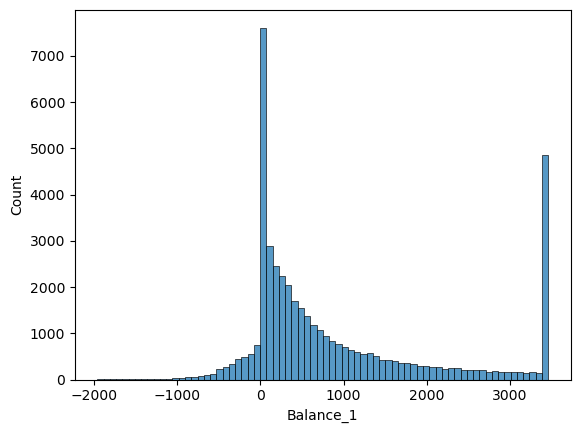

In [435]:
sns.histplot(data=df,x=df['Balance_1'])

<Axes: xlabel='count', ylabel='Opening_of_Term-deposit_Acct'>

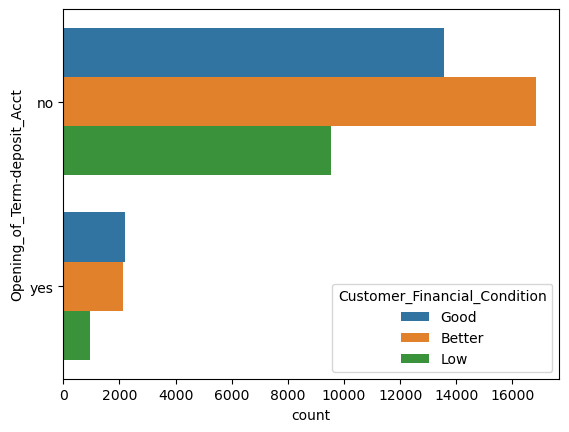

In [436]:
df['Customer_Financial_Condition']=np.where((df['Salary']<40000) & (df['Balance_1']<1500),'Low',
                                      np.where((df['Salary']<80000) & (df['Balance_1']<2500),'Better',
                                                                            'Good'))

sns.countplot(data=df,hue=df['Customer_Financial_Condition'],y=df['Opening_of_Term-deposit_Acct'])

<Axes: xlabel='count', ylabel='Opening_of_Term-deposit_Acct'>

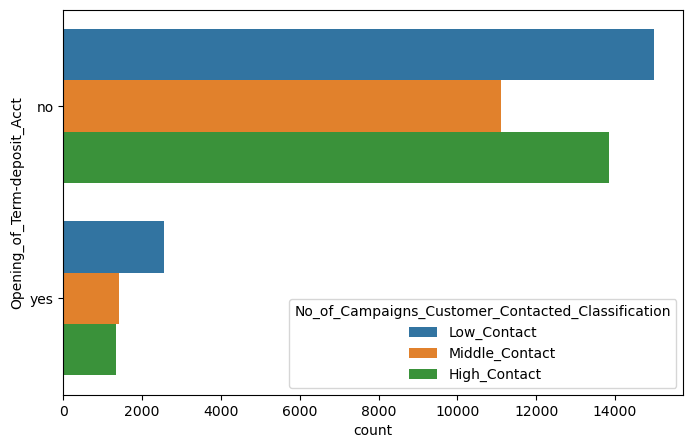

In [437]:
df['No_of_Campaigns_Customer_Contacted_Classification']=np.where(df['No_of_Campaigns_Customer_Contacted_1']<2,'Low_Contact',
                                                                 np.where(df['No_of_Campaigns_Customer_Contacted_1'] < 3,'Middle_Contact',
                                                                          'High_Contact'))

plt.figure(figsize=(8,5))
sns.countplot(data=df,hue=df['No_of_Campaigns_Customer_Contacted_Classification'],y=df['Opening_of_Term-deposit_Acct'])

#### Conclusion for Objective 7-

1. Across all the created age categories, all the categories have recorded negative response towards the campaign.
2. Based on the no of campaigns, customers who have have targetted more no of times is showcasing negative response towards the account opening and vice versa.

## Objective(8)- Correlation Analysis

### 8)-a. Examine correlations between independent variables to identify multicollinearity.

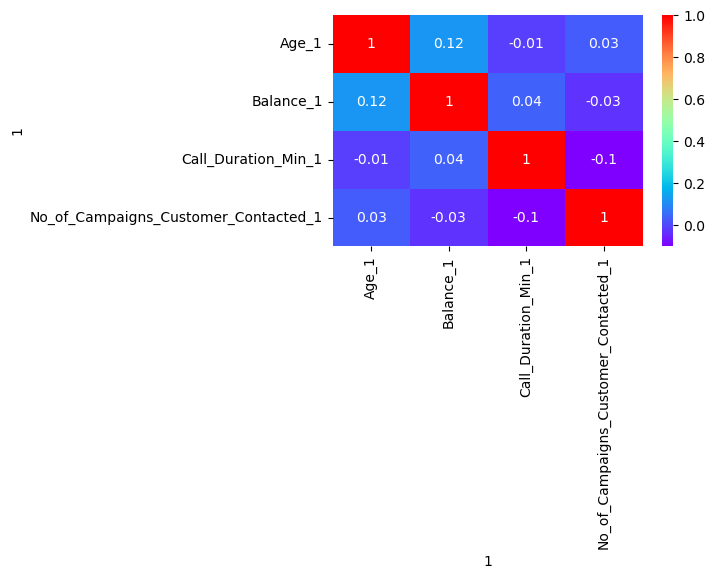

In [438]:
# Apart from all the numerical variables, only Age, Balance, and Call duration follows the normal dustribution. 

cor=df[['Age_1','Balance_1','Call_Duration_Min_1','No_of_Campaigns_Customer_Contacted_1']].corr().round(2)

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(5,3))

# heatmap
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()


#### Conclusion for objective 8.a- 
As the Pearson's correlation coefficient for the Age, balance, call duration attributes, and No_of_Campaigns_Customer_Contacted_1 remained less than 0.1, there is no relationship between them. Hence, there is no presence of multi collinearity between the independent continuous variables. 

### 8)-b. Evaluate how correlated features may influence the target variable.

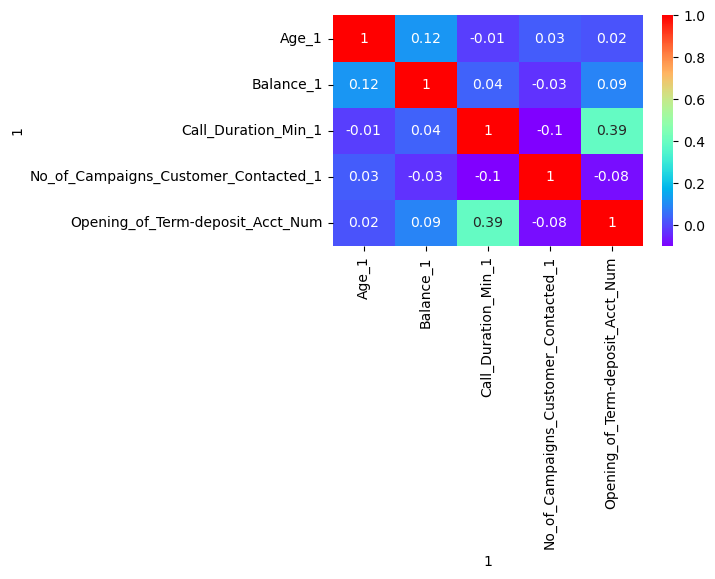

In [439]:
cor_2=df[['Age_1','Balance_1','Call_Duration_Min_1','No_of_Campaigns_Customer_Contacted_1','Opening_of_Term-deposit_Acct_Num']].corr().round(2)
cor_2

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(5,3))

# heatmap
sns.heatmap(cor_2, cmap="rainbow", annot=True)
plt.show()

#### Conclusion for Objective 8.b - 
1. The Pearson's correlation coefficient for the dependent targer variable [Opening_of_Term-deposit_Acct_Num] and independent varaiable [Call Duration_1] is 0.4. Hence, there exists a positive moderate relationship between these two variables. 
2. As there exists no correlationship between the independent variables (multicollinearity), we can conclude that only call duration is impacting the target variable.

## Objective(9)- Outlier Detection and Handling

This step has already worked on after the imputation in data preparation step no-6 (mentioned above part of the analysis). The variables Age, call duration, balance, and No of campaigns follows the normal distrubution. Hence for them we have determined the outiers and handled them using the IQR method (As outliers were distributed extremely).

## Saving Final Data to an Excel File- 

In [260]:
# Final Data File- 

df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
1,,,,,,,,,,,,,,,,,,,,,
Day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
Month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Customer_Id,1,2,3,4,5,6,7,8,9,10,...,45202,45203,45204,45205,45206,45207,45208,45209,45210,45211
Marital_Status,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
Past_Targeted,yes,yes,yes,no,no,yes,no,no,yes,yes,...,yes,yes,no,yes,yes,yes,yes,yes,yes,yes
Past_Loan_Default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
Housing_Loan,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
Personal_Loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no
